# COGS 108 - MBTI Prediction Based on Twitter Content

## Video Link

https://drive.google.com/file/d/1e1lfoOPIJFDOfJfOw1iD4m76-8Jn9v3Q/view

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

In this project, we explored the relationship between a user’s Twitter content and their MBTI classification. We used Twitter and MBTI information from a dataset that conatains 8,328 users and analyzed 5 tweets per user using sentiment analysis and frequency distribution plots. We then used SVM to train a model that predicts a user's MBTI type based on their Twitter content. Our results indicate that the relationship between the variables analyzed and a user’s MBTI type is inconclusive.

# Names

- Alexa Barbosa
- Audrey Chung
- Ashley Ho
- Ariann Manlangit
- Akhila Nivarthi

<a id='research_question'></a>
# Research Question

Can we predict how an individual's MBTI is classified based on the content they share on Twitter, specifically the text sentiment and word frequency of their posts, as well as average user tweet statistics (average tweet length, average mentions count, average media count, and average retweet count)?

<a id='background'></a>

## Background & Prior Work

The MBTI has been a topic of interest in personality psychology for many years, and despite the criticisms of the tool, it has yielded valuable insights into personality differences and continues to be extensively utilized in various contexts. The Myers-Briggs Type Indicator (MBTI) identifies people’s personality through a combination of 4 identifying letters: (E) extrovert, (I) introvert, (S) sensor, (N) intuitive, (T) thinking, (F) feeling, (J) judge, and (P) perceive. Each MBTI has a name and characteristics for each letter combination. For example, INFPs are known as “the Mediator” [^simkus]. Personality is a complex construct that is influenced by various factors, including genetics, upbringing, and life experiences. Therefore, any research exploring the relationship between social media behavior and personality should be conducted with caution and acknowledge the limitations and potential biases of the methodology. An individual’s personality can be predicted based on the content they share on Twitter, but it would require a large dataset of tweets from individuals with known MBTI types, and sophisticated natural language processing, and machine learning techniques to analyze the content of these tweets. 

Some prior work has been made on the topic of investigating the relationship between one’s social media profiles and their MBTI personality. The earliest research dates back to 2006 and showed that using various sets of words found in blog content, researchers were able to accurately predict the personalities of blog users. However, the work done was based on small and homogeneous samples. More recently, scholars have focused towards improving the accuracy of predictions with the help of various machine learning algorithms. One example is a Rutgers University Masters thesis written by Weiling Li in 2021 that used Twitter data to predict user MBTI classification. Li’s research was based on 4000 Twitter users who self-reported their personality types and 425,752 tweets these users posted. Li utilized two-sample t-tests, stepwise logistic regressions to conclude that there exists a strong association between an individual’s social media activity and their MBTI type [^li]. Li then used machine learning algorithms such as K Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM) to predict MBTI based on social media data, achieving a model with an average test accuracy of 67.6%. In the study, Li comments that obtaining information through social media platforms offers longitudinal data, enabling researchers to access information from users over a period of time and measure changes in their activities [^li]. 

In another study from 2021, members of the Department of Computer Science and Engineering at BMS University of Technology and Management conducted a study that used machine learning classifiers and sentiment analysis of Twitter data to predict MBTI. The sentiment analysis done in this study used Bidirectional Encoder Representation from Transformers (BERT), which is able to understand the difference between the sentiment of words when they are used in different contexts [^kaushal et al.]. Similar to Li’s study, Kaushal et al used KNN, SVM, logistic regression, decision tree, random forest and stochastic gradient descent to create various models to predict personality type based on tweets. Kaushal et al concluded that MBTI type can indeed be predicted by tweet content and that SVM performed better than the other algorithms [^kaushal et al.]. At the end of the study, Kaushal et al also comments that this kind of prediction model could be expanded to be used in the recruitment process for recruiters to learn more about the personality of potential hires. In addition, this work could also be used to develop health applications that focus on early protection, intervention, and proper treatment of various physical and mental health issues [^kaushal et al].

References:
- [^simkus]: Simkus, J. (23 Apr 2023) “How the Myers-Briggs Type Indicator Works: 16 Personality Types.” *Simply Psychology*. https://www.simplypsychology.org/the-myers-briggs-type-indicator.html
- [^li]: Li, W. (May 2021) "Predicting MBTI Personality Type of Twitter Users." Rutgers University-Camden, Master's Thesis. https://rucore.libraries.rutgers.edu/rutgers-lib/65730/PDF/1/play/
- [^kaushal et al.]: Kaushal, P. et al. (08 Dec 2021) "Myers-briggs Personality Prediction and Sentiment Analysis of Twitter using Machine Learning Classifiers and BERT." *International Journal of Information Technology and Computer Science (IJITCS)*, Vol.13, No.6, pp.48-60.https://www.mecs-press.org/ijitcs/ijitcs-v13-n6/IJITCS-V13-N6-4.pdf

# Hypothesis


We hypothesize that there is an underlying relationship between the classification of an individual's MBTI and the content of the tweets they post. We believe that textual components such as word choice, capitalization, punctuation usage, and emoji usage, as well as the quantitative measures such as tweet length and tweet frequency, are indicative of an individual’s personality traits. Our background research has indicated that individuals are likely to express their true personas online and that often times how we identify in real life can be portrayed through our online presence.

# Dataset(s)

- Dataset Name: Twitter MBTI Personality Types
- Link to the dataset: https://www.kaggle.com/datasets/sanketrai/twitter-mbti-dataset
- Number of observations: 8,328

This dataset contains information sourced from Twitter API about 8,328 Twitter users that have self-reported their MBTI types in their profile descriptions. The dataset is comprised of three csv files. The first file stores users' MBTI classifications. The second file includes publicly-availiable data about their account such as their username, follower counts, location, and verification status. The final file contains users' 200 most recent tweets posted on or before March 31, 2020.

# Setup

In [1]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})

from langdetect import detect, LangDetectException
from nltk.tokenize import word_tokenize
from cleantext import clean

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashley/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/ashley/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ashley/nltk_data...


True

In [2]:
# first csv file from dataset
# contains unique id value for each user and their mbti

df_mbti = pd.read_csv('data/mbti_labels.csv')
df_mbti.head()

,id,mbti_personality
0,160881623,infp
1,28968838,infp
2,2325006565,infp
3,907848145,infp
4,1330237585,infp


In [3]:
# check shape

df_mbti.shape

(8328, 2)

In [4]:
# check column data types

df_mbti.dtypes

id                   int64
mbti_personality    object
dtype: object

In [5]:
# second csv file from dataset
# contains user info including display name, bio, location, follower count, avg tweet length

df_user = pd.read_csv('data/user_info.csv')
df_user.head()

,id,id_str,name,screen_name,location,description,verified,followers_count,friends_count,listed_count,...,total_mentions_count,total_media_count,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count
0,160881623,160881623,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,False,1904,782,67,...,139,114,200.0,11.785000,3003.580000,0.980000,0.250000,0.185000,0.695000,0.570000
1,28968838,28968838,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,False,14135,1338,47,...,156,34,200.0,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000
2,2325006565,2325006565,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,False,1223,604,31,...,170,40,199.0,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005
3,907848145,907848145,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",False,8512,312,147,...,174,77,192.0,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042
4,1330237585,1330237585,Sei💫,nemuiryuu,NaN,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,False,1805,340,69,...,127,99,200.0,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000


In [6]:
# check shape

df_user.shape

(8328, 28)

In [7]:
# check column data types

df_user.dtypes

id                                int64
id_str                            int64
name                             object
screen_name                      object
location                         object
description                      object
verified                           bool
followers_count                   int64
friends_count                     int64
listed_count                      int64
favourites_count                  int64
statuses_count                    int64
number_of_quoted_statuses         int64
number_of_retweeted_statuses      int64
total_retweet_count               int64
total_favorite_count              int64
total_hashtag_count               int64
total_url_count                   int64
total_mentions_count              int64
total_media_count                 int64
number_of_tweets_scraped        float64
average_tweet_length            float64
average_retweet_count           float64
average_favorite_count          float64
average_hashtag_count           float64


In [8]:
# third csv file from dataset
# contains ~200 tweets per user id

df_tweets = pd.read_csv('data/user_tweets.csv')
df_tweets.head()

,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_191,tweet_192,tweet_193,tweet_194,tweet_195,tweet_196,tweet_197,tweet_198,tweet_199,tweet_200
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,NOOOOOOOOOOO MURCIA HA CAÍDO TAMBIÉN 😔😔😔,@ederugaruto Si te están amenazando de esa man...,19. Siempre me han encantado los días de fuego...,RT @pupa_puuupa: 4〜6 https://t.co/Hhdv33tWOi,RT @TANA_in_: 뜨거운 여름 밤은 가고 남은 건 볼품없지만 https://...,RT @Vivi95862484: ❤️💙 https://t.co/OAv2F1FKLc,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @GingerSpirits: AB giving me Lucas content?...,RT @musicfanforeva2: god bless the writers of ...,RT @AtheerforAnne: @TahiraOsman4 https://t.co/...,RT @TahiraOsman4: Who can pinpoint the exact m...,"RT @TahiraOsman4: Dear Gilbert,\n\nI'm throwin...",RT @TahiraOsman4: (ANNE NATION)\n\nwe are ever...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,RT @NYLONJAPAN: “今週何買う？”をテーマに男女共に楽しめるファッションページ...,@coffeebourbon OMFG,RT @MLBJapan: 【 #ドジャース 】3度の #サイヤング賞 左腕が今日も好投！3...,RT @LDH__TV: 本日21時配信📺\n大好評🎉✨16人での慰安旅行未公開ベスト10🎞...,I pressed the up button on an elevator that wa...,笑,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",NaN
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,RT @sehunownsme: [hunstagram] Remember to your...,RT @mishyeol: [🖼WP] \nEXO-L Welcome Kit Photo ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,nothing as expected,this game was a mistake,fuck it 

In [9]:
# check shape

df_tweets.shape

(24598, 201)

In [10]:
# check column data types

df_tweets.dtypes

id           object
tweet_1      object
tweet_2      object
tweet_3      object
tweet_4      object
              ...  
tweet_196    object
tweet_197    object
tweet_198    object
tweet_199    object
tweet_200    object
Length: 201, dtype: object

# Data Cleaning

**STEP 1**

Since users' MBTI classifications are stored in `df_mbti`, their profile information (including username, bio, follower count, average tweet length, etc.) is stored in `df_user`, and their tweets are stored in `df_tweets`, we need to merge the three dataframes using the unique user 'id' column. We will store the merged dataframes in the variable `df`. 

`df_mbti` and `df_user` merge easily since the 'id' column in both dataframes are of type `int64`, which we saw above from using dtypes. For `df_tweets`, since the values stored in the 'id' column are of type `object`, we will write a function that converts the types before merging.

Also, since there are around 200 tweets per user and about 8000 users, we will only be taking 5 tweets per user to increase computational efficiency.

In [11]:
# merge `df_mbti` and `df_user` using unique user 'id' column

df = pd.merge(df_mbti, df_user, on = 'id')

In [12]:
# drop unneeded columns in the merged dataframe

df = df[['id', 'mbti_personality', 'average_mentions_count', 'average_tweet_length', 
         'average_media_count', 'average_retweet_count']]

In [13]:
# function to change the type of 'id' column in df_tweets
# certain values in this column cannot be directly casted to int (since they contain characters)
# thus every 'id' that contains non-numeric values will be replaced with NaN

def id_int(in_value):
    try:
        output = pd.to_numeric(in_value).astype(int)
    
    except:
        output = np.nan
    
    return output

In [14]:
# apply id_int function to the 'id' column in df_tweets

df_tweets['id'] = df_tweets['id'].apply(id_int)

In [15]:
# only take 10 tweets per user

df_tweets = df_tweets.drop(df_tweets.loc[:, 'tweet_6':], axis = 1)

In [16]:
# merge `df_tweets` with `df` using unique user 'id' column

df = pd.merge(df, df_tweets, on = 'id')
df.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5
0,160881623,infp,0.695000,11.785000,0.570000,3003.580000,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...
1,28968838,infp,0.780000,16.150000,0.170000,3718.745000,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag
2,2325006565,infp,0.854271,9.668342,0.201005,3722.211055,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...
3,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...
4,1330237585,infp,0.635000,7.655000,0.495000,827.370000,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal..."


**STEP 2**

Now that the 3 dataframes are merged into one single dataframe `df`, we will check for any missing values and drop any rows/columns containing missing data. 

In [17]:
# drop all rows and columns with missing info

df = df.dropna(axis = 0)
df = df.dropna(axis = 1)
df

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5
0,160881623,infp,0.695000,11.785000,0.570000,3003.580000,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...
1,28968838,infp,0.780000,16.150000,0.170000,3718.745000,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag
2,2325006565,infp,0.854271,9.668342,0.201005,3722.211055,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...
3,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...
4,1330237585,infp,0.635000,7.655000,0.495000,827.370000,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal..."
...,...,...,...,...,...,...,...,...,...,...,...
7829,489644768,estj,1.316583,16.804020,0.035176,71.497487,RT @vonerhan: There’s more to the story. SoulC...,"Also 👇🏼 - in college, I used to bake my feelin...",Last night something incredible happened. I sp...,@vonerhan All on the heels of Opening Ceremony...,@vonerhan @Spotify This almost feels more pers...
7830,3061139834,estj,1.301508,17.844221,0.010050,6.628141,"I don't need a man, I just need my mom 😂😭💞💞😍😍 ...",@estjHoran @batangususan look at the date,I love you daw sabi ni jen.,RT @intrepidnouis: RT THIS \n#TOMORROWProjectN...,😢😢😢 #AlwaysInOurHeartsZaynMalik
7831,329077476,estj,0.899083,13.504587,0.073394,40.119266,RT @MoTheComedian: Isolation Sessions: Kavani’...,RT @danthomas1958: PL season stats from @TheAt...,RT @YouthDidcot: A huge well done to the boys ...,RT @JPL_Gareth: Cracking opportunity to join @...,RT @leysacademy: Half Term Play Scheme | 17th ...
7832,781835161394614272,estj,0.162162,14.675676,0.351351,3.202703,Hoy sera la entrega de premios al campeon de l...,Les estuvimos comentando de nuestra famosa est...,Bienvenidos a los chicos de segundo año de pal...,Recordando buenos momentos de la estudiantina ...,Vamoss respondan la encuesta!! https://t.co/yo...


**STEP 3**
   
Since we will be performing sentiment analysis, we will use the `detect` and `LangDetectException` from Python's `langdetect` library to filter out tweets that are non-English. We will write a function that uses `detect` to identify the language of input text and apply this function to each of the 5 columns containing tweets; we will store the function output in 5 new separate columns. We will then filter `df` to only keep rows that have 'en' (English) for all 5 tweets. We then drop the 'lang' columns, as they are no longer necessary after this process is complete.

In [18]:
# function to identify the language of each of the tweets using `detect`

def lang_detect(text):
    try:
        result = detect(text)
    except LangDetectException as e:
        result = str(e)
    return result

In [19]:
# apply lang_detect function to each of the 5 tweet columns

for i in range(5):
    df['lang' + str(i+1)] = df.iloc[:,(i+6)].apply(lang_detect) 

In [20]:
# keep only the rows where all 5 tweets are in english ('en' output from `detect`)

for i in range(5):
    df = df[df['lang' + str(i+1)] == 'en']

In [21]:
df.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,lang1,lang2,lang3,lang4,lang5
3,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,en,en,en,en,en
5,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",RT @KW33NSOHI9H: I grew up and still have mome...,en,en,en,en,en
8,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,RT @thespinsterymc: Dear ableds: Panic buying ...,en,en,en,en,en
9,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",RT @CeeHawk: Ministry of Darkness but the Supr...,en,en,en,en,en
11,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,RT @_ReaalAmerican_: @GOP @Mike_Pence https://...,en,en,en,en,en


In [22]:
# drop the 'lang' columns 

lang = []
for i in range(5):
    lang.append('lang' + str(i+1))
df = df.drop(columns = lang)

In [23]:
# reset the index so that the rows are in numerical order

df = df.reset_index(drop=True)
df.index = df.index + 1
df.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5
1,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...
2,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",RT @KW33NSOHI9H: I grew up and still have mome...
3,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,RT @thespinsterymc: Dear ableds: Panic buying ...
4,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",RT @CeeHawk: Ministry of Darkness but the Supr...
5,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,RT @_ReaalAmerican_: @GOP @Mike_Pence https://...


**STEP 4**

Finally, we will apply `word_tokenize` from `nltk` to each of the tweets in preparation for EDA.

In [24]:
# tokenize the tweets

for i in range(5):
    df['token_' + str(i + 1)] = df['tweet_' + str(i + 1)].apply(word_tokenize)

In [25]:
# current version of `df`

df

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,token_1,token_2,token_3,token_4,token_5
1,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,"[RT, @, yep4andy, :, 🤷‍♀️, #, EXOLSelcaDay, @,...","[RT, @, lqldks, :, when, is, this, from, ?, ?,...","[RT, @, j__nmyeon, :, since, we, 're, talking,...","[I, am, supporting, this, fundraising, page, h...","[RT, @, cubsie_, :, Sun, and, moon, outfits, h..."
2,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",RT @KW33NSOHI9H: I grew up and still have mome...,"[RT, @, KingKamale, :, The, media, are, just, ...","[RT, @, cinderCHERELla, :, How, my, mother, fe...","[RT, @, KW33NSOHI9H, :, I, know, now, ,, as, a...","[RT, @, KW33NSOHI9H, :, In, the, right, now, ,...","[RT, @, KW33NSOHI9H, :, I, grew, up, and, stil..."
3,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,RT @thespinsterymc: Dear ableds: Panic buying ...,"[RT, @, Hypable, :, #, Supergirl, really, miss...","[RT, @, karazrell, :, Wild, how, most, of, the...","[RT, @, livefortheapple, :, Let, it, be, known...","[RT, @, paoloumpa, :, The, ultimate, ghost, Po...","[RT, @, thespinsterymc, :, Dear, ableds, :, Pa..."
4,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",RT @CeeHawk: Ministry of Darkness but the Supr...,"[RT, @, CreoleBabyBritt, :, 🎶Comic, View, on, ...","[@, EmpressMoe_, Kids, are, observant, and, in...","[RT, @, TheEnemiesPod, :, https, :, //t.co/jgO...","[If, you, are, reading, this, ,, you, have, ma...","[RT, @, CeeHawk, :, Ministry, of, Darkness, bu..."
5,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,RT @_ReaalAmerican_: @GOP @Mike_Pence https://...,"[RT, @, A4Ny14, :, #, ResignTrump, https, :, /...","[RT, @, GoddessOfFireB, :, This, was, from, da...","[RT, @, NYCanegirl, :, YOU, HAVE, TO, READ, TH...","[@, fras99, Take, my, vitamins, &, amp, ;, eve...","[RT, @, _ReaalAmerican_, :, @, GOP, @, Mike_Pe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3095624063,estj,1.530000,14.715000,0.055000,8.145000,@AssumeNormality @VUHealthPol O.M.G. What a WO...,RT @unitedwaympc: What do you think? Help the ...,"@JohnMullahy @Twitter Thank you, @JohnMullahy!...",Campaign promise to practice: What Medicare Fo...,@NWPapageorge Our 🦈 book plays a song in which...,"[@, AssumeNormality, @, VUHealthPol, O.M.G, .,...","[RT, @, unitedwaympc, :, What, do, you, think,...","[@, JohnMullahy, @, Twitter, Thank, you, ,, @,...","[Campaign, promise, to, practice, :, What, Med...","[@, NWPapageorge, Our, 🦈, book, plays, a, song..."
3485,790650559086854144,estj,0.572864,15.964824,0.170854,9375.703518,RT @theofficenbc: It has come to this. https:/...,@buybuyBABY I put the wrong email in when I ma...,Baby’s First Apocalypse ☄️ https://t.co/hKlMZU...,Love that I have a headache and am trying to n...,RT @ashleycat9: Help a girl out and buy my soa...,"[RT, @, theofficenbc

# Data Analysis & Results

## EDA

**STEP 1**

We first conduct EDA to get a sense what information is stored in the dataframe `df`. We can check out the shape and the variables of `df`, as well as the type of these variables.

In [26]:
# determine shape of the data

df.shape

(3488, 16)

In [27]:
# determine variables and their types

df.dtypes

id                          int64
mbti_personality           object
average_mentions_count    float64
average_tweet_length      float64
average_media_count       float64
average_retweet_count     float64
tweet_1                    object
tweet_2                    object
tweet_3                    object
tweet_4                    object
tweet_5                    object
token_1                    object
token_2                    object
token_3                    object
token_4                    object
token_5                    object
dtype: object

`mbti_personality` is our classification variable, which is of type string. Variables `average_mentions_count`, `average_tweet_length`, `average_media_count`, and `average_retweet_count` are numerical. All `tweet_#` variables are strings and all `token_#` variables are lists of strings. We can calculate some descriptive statistics for the numerical variables:

In [28]:
# determine how many users of each mbti type are in the data

df['mbti_personality'].value_counts()

infj    487
intj    451
enfp    430
infp    382
enfj    324
intp    300
entj    245
entp    244
isfj    159
istj    127
estj     84
esfj     78
isfp     60
esfp     46
istp     43
estp     28
Name: mbti_personality, dtype: int64

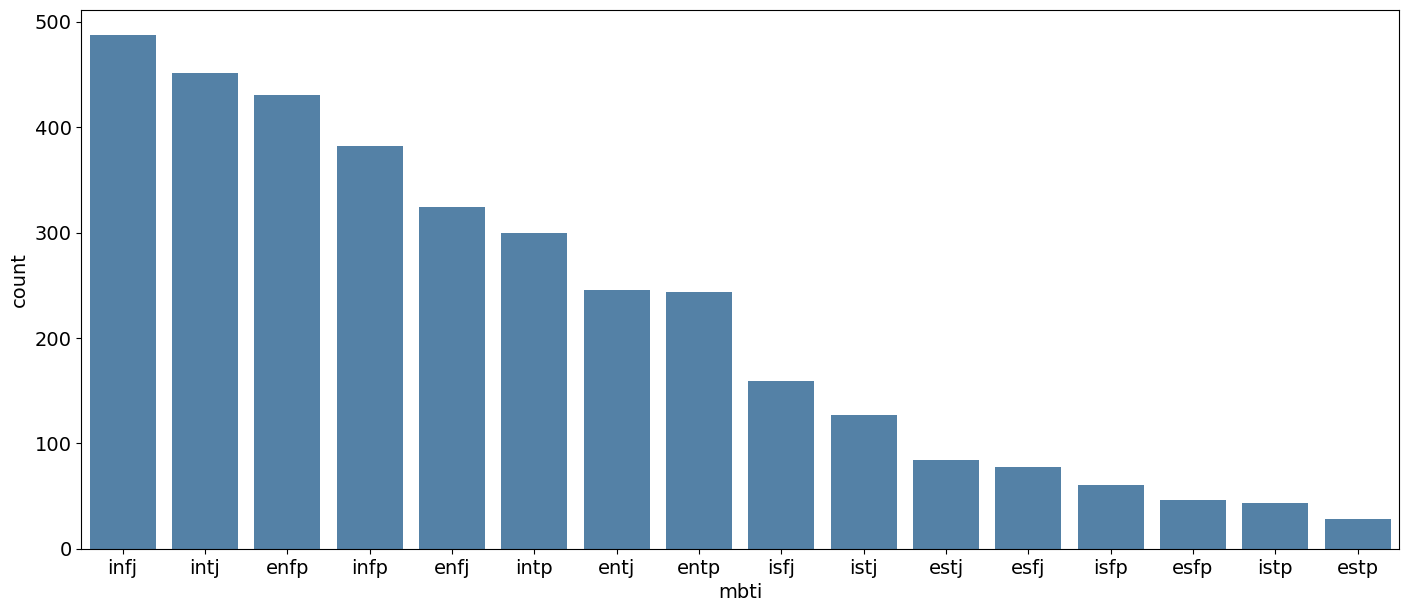

In [29]:
df_value = pd.DataFrame(data = df['mbti_personality'].value_counts()).reset_index()
df_value = df_value.rename(columns = {'index': 'mbti', 'mbti_personality': 'count'})

sns.barplot(x = 'mbti', y = 'count', data = df_value, color = 'steelblue');

We can see the number of users per MBTI in the plot above. At the maximum, there are 488 tweets classified as INFJ that will be used for analysis. The plot shows us that in the data there is quite a discrepency between the amount of users of each MBTI type and at the minimum there are only 26 ESTP users in the cleaned dataframe. However, we are using 5 tweets per user, which we will be merging into a single string later on to be used for analysis, so the corpus of each (and subsequently, the corpus of each user) be user will be more extensive. 

**STEP 2**

We will now investigate if there exists any relationships between MBTI types and the numerical variables `average_mentions_count`, `average_tweet_length`, `average_media_count`, and `average_retweet_count`. To achieve this, we will first subset the dataframe for each MBTI and average their `average_mentions_count` column. We then repeat this for the `average_tweet_length`, `average_media_count`, and `average_retweet_count` columns. We will use barplots to visualize the results.

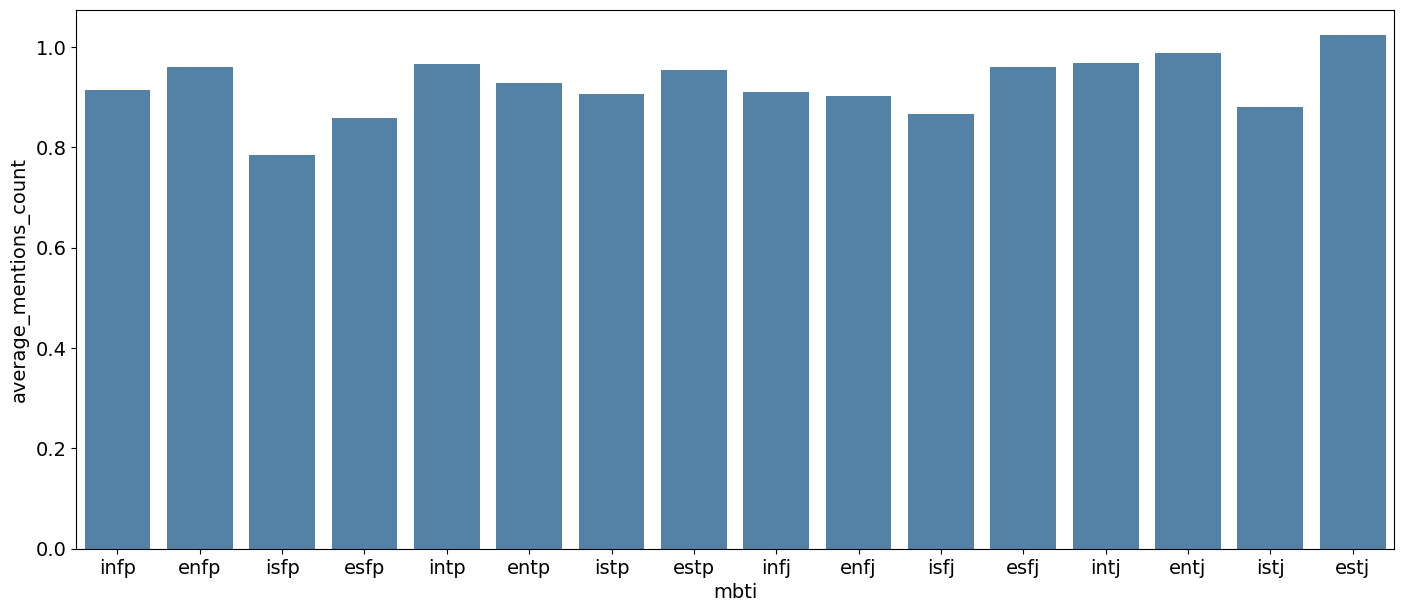

In [30]:
# find the mean mentions count for each individual MBTI

mbti_list = {}
def mean_mentions(str):
    mbti_mean = df[df['mbti_personality']== str].average_mentions_count.mean()
    mbti_list[str] = mbti_mean
    return mbti_list

unique_mbti = df['mbti_personality'].unique()

for element in unique_mbti:
    mean_mentions(element)
    
# plot the averages into a barplot
length_df = pd.DataFrame(mbti_list.items(), columns=['mbti', 'average_mentions_count'])
sns.barplot(x = 'mbti', y = 'average_mentions_count', data = length_df, color = 'steelblue');

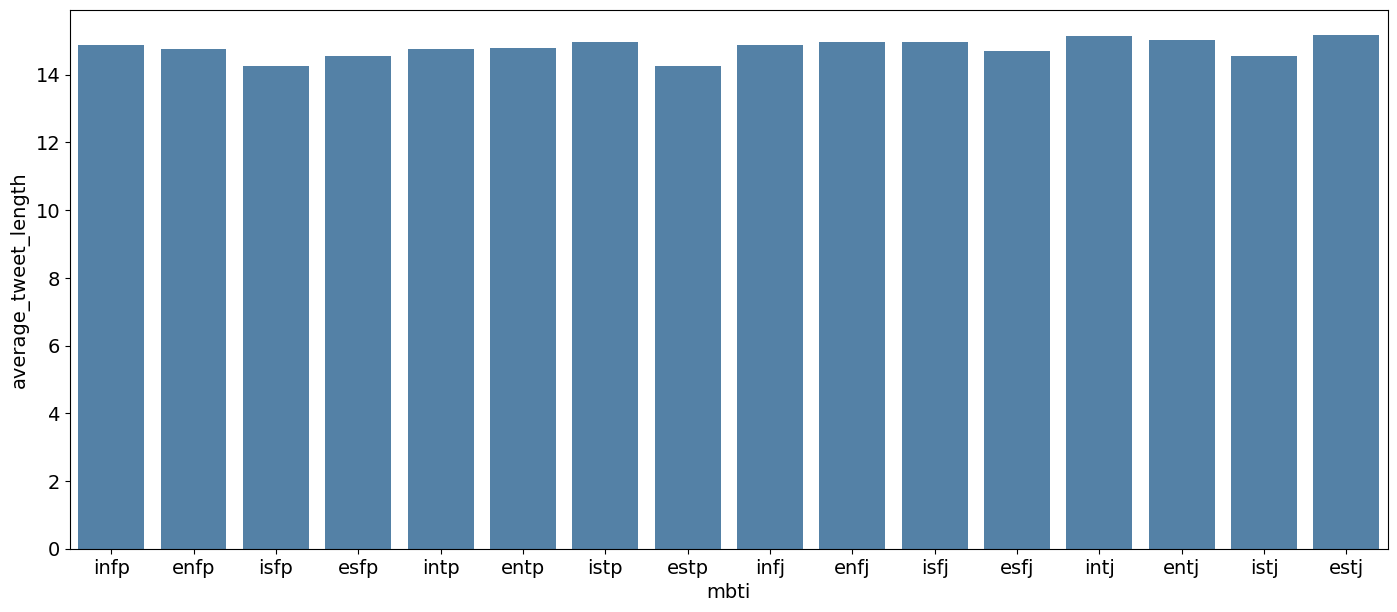

In [31]:
# find the mean tweet length for each individual MBTI

mbti_list = {}
def mean_length(str):
    mbti_mean = df[df['mbti_personality']== str].average_tweet_length.mean()
    mbti_list[str] = mbti_mean
    return mbti_list

unique_mbti = df['mbti_personality'].unique()

for element in unique_mbti:
    mean_length(element)
    
# plot the averages into a barplot
length_df = pd.DataFrame(mbti_list.items(), columns=['mbti', 'average_tweet_length'])
sns.barplot(x = 'mbti', y = 'average_tweet_length', data = length_df, color = 'steelblue');

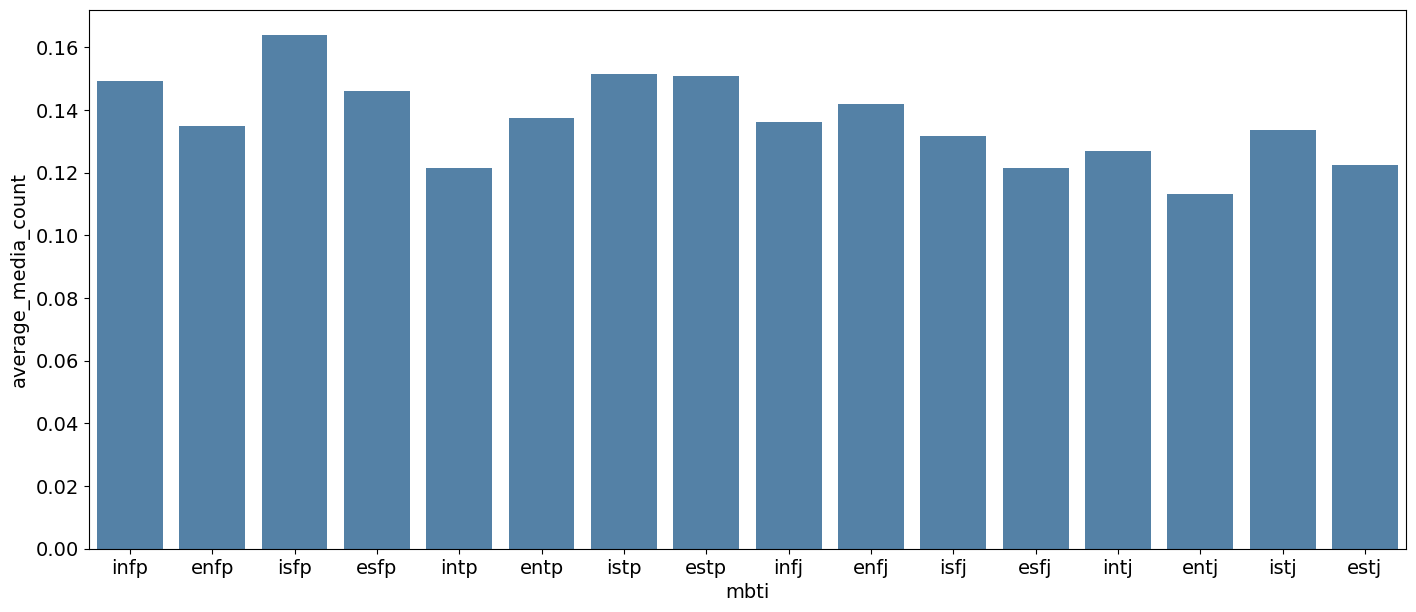

In [32]:
# find the mean media count for each individual MBTI

mbti_list = {}
def mean_media(str):
    mbti_mean = df[df['mbti_personality']== str].average_media_count.mean()
    mbti_list[str] = mbti_mean
    return mbti_list

unique_mbti = df['mbti_personality'].unique()

for element in unique_mbti:
    mean_media(element)
    
# plot the averages into a barplot
length_df = pd.DataFrame(mbti_list.items(), columns=['mbti', 'average_media_count'])
sns.barplot(x = 'mbti', y = 'average_media_count', data = length_df, color = 'steelblue');

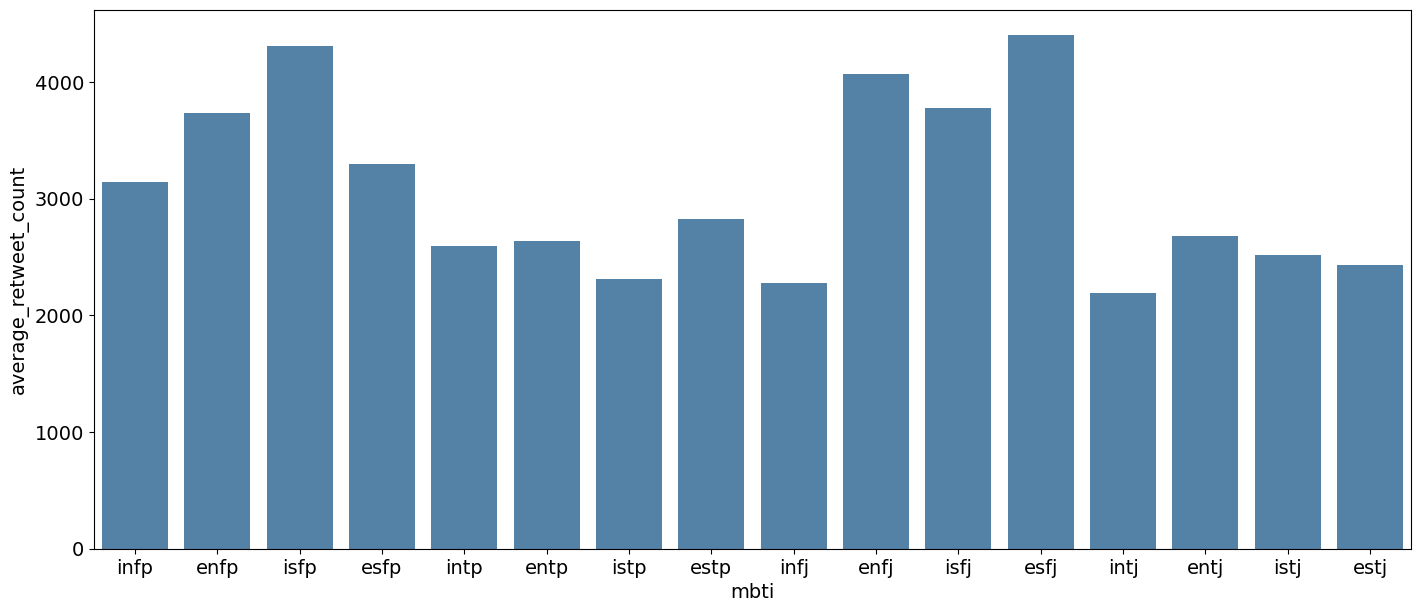

In [33]:
# find the mean retweet count for each individual MBTI

mbti_list = {}
def mean_retweet(str):
    mbti_mean = df[df['mbti_personality']== str].average_retweet_count.mean()
    mbti_list[str] = mbti_mean
    return mbti_list

unique_mbti = df['mbti_personality'].unique()

for element in unique_mbti:
    mean_retweet(element)
    
# plot the averages into a barplot
length_df = pd.DataFrame(mbti_list.items(), columns=['mbti', 'average_retweet_count'])
sns.barplot(x = 'mbti', y = 'average_retweet_count', data = length_df, color = 'steelblue');

Observing the results of these four barplots, the mean tweet length per MBTI and mean mention count per MBTI do not explicitly vary enough to be a significant asset to our analysis. However, we would like to analyze the correlation between MBTI and mean media count as well as mean retweet count having found possible patterns in the barplots themselves that would need a more in depth study. We can explore the outliers for the average_media_count and average_retweet_count variables below.

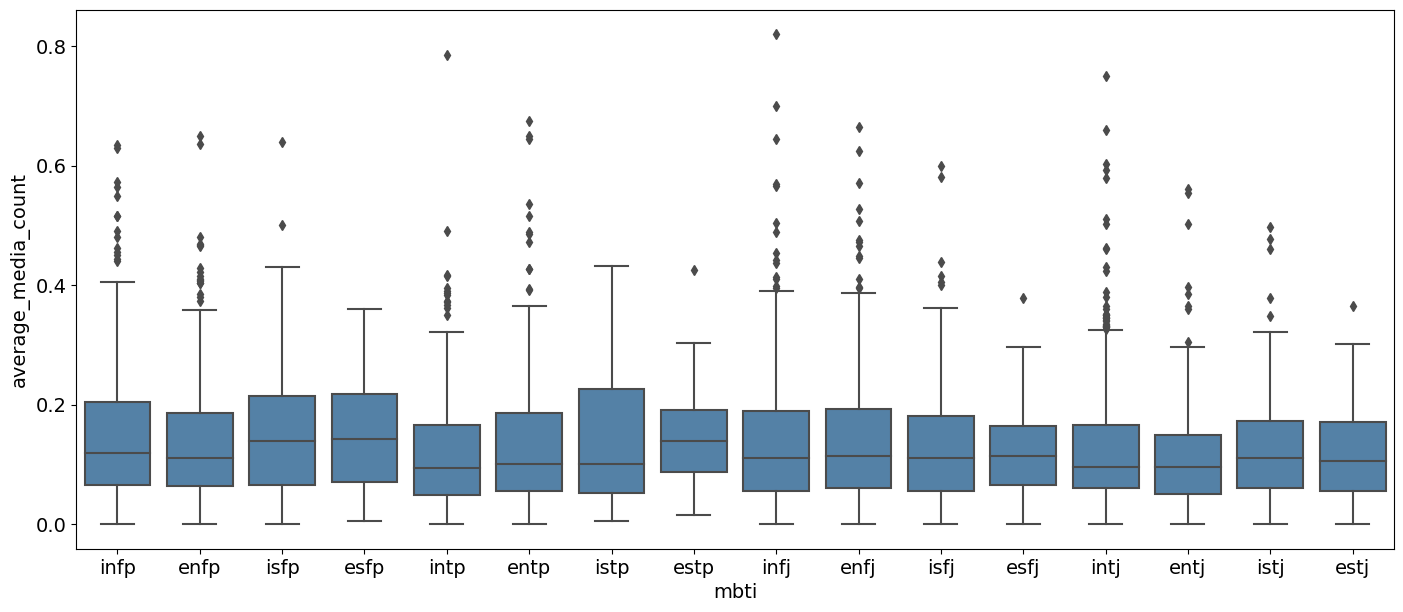

In [34]:
mbti_v_media = sns.boxplot(y='average_media_count', x='mbti_personality', data=df, color = 'steelblue');
mbti_v_media.set(xlabel='mbti');

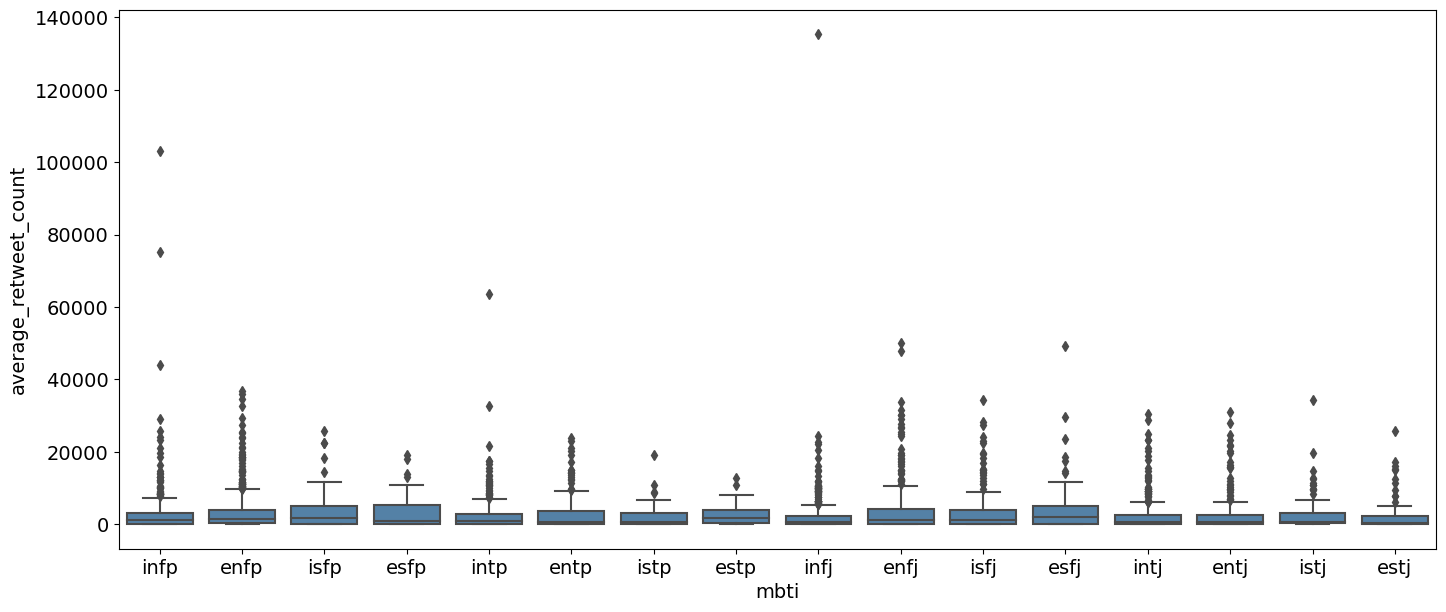

In [35]:
mbti_v_retweet = sns.boxplot(y='average_retweet_count', x='mbti_personality', data=df, color = 'steelblue');
mbti_v_retweet.set(xlabel='mbti');

From these boxplots, we notice that most, if not all, categories contain outlier values for both of these variables. The most extreme outlier is from an INFJ user with an average retweet count of almost 140000. Since we plan to use mainly text for our anaylsis, we will keep these observations in the data since the text content of a user is not affected by outliers for these variables. However, if we end up using these two variables in our analysis, we may end up having to remove these outlier observations from the data.

**STEP 3**

Now, we will investigate if there exists any relationships between MBTI and tweet content. Before doing so, we must clean the text data by first removing all instances of 'RT @username', '@username', and 'https:link' from the tokenized version of the text (we performed text tokenization in the Data Cleaning porttion above). Having the text tokenized into a list makes this cleaning process much easier since, for example, 'RT @username' is separated into ['RT', '@', 'username']. This allows us to simply iterate through the tokenized text list and whenever we encounter 'RT', we delete it and the 2 strings after it. We use a similar process for removing '@username' and 'https:link' occurrences in the text. We remove these parts of the text since they do not have any meaning that could be used for text analysis.

In [36]:
# make a deep copy of `df` so we also have access to the original version of the dataframe 

df1 = df.copy(deep = True)

In [37]:
# function to delete RT (retweets) and the username

def remove(lst):
    # delete RT
    if lst[0] == 'RT':
        for i in range(4):
            del lst[0]
    
    return lst

In [38]:
# apply remove function to token columns

for i in range(5):
    df1['token_' + str(i+1)] = df1['token_' + str(i+1)].apply(remove)

In [39]:
df1.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,token_1,token_2,token_3,token_4,token_5
1,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,"[🤷‍♀️, #, EXOLSelcaDay, @, weareoneEXO, https,...","[when, is, this, from, ?, ?, ?, 😭😭😭, https, :,...","[since, we, 're, talking, about, suhø, ,, a, f...","[I, am, supporting, this, fundraising, page, h...","[Sun, and, moon, outfits, https, :, //t.co/0Fg..."
2,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",RT @KW33NSOHI9H: I grew up and still have mome...,"[The, media, are, just, feeding, fear, over, t...","[How, my, mother, feels, about, these, cheap, ...","[I, know, now, ,, as, an, adult, ,, it, ’, s, ...","[In, the, right, now, ,, I, know, that, you, n...","[I, grew, up, and, still, have, moments, of, t..."
3,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,RT @thespinsterymc: Dear ableds: Panic buying ...,"[#, Supergirl, really, missed, the, mark, with...","[Wild, how, most, of, the, media, response, to...","[Let, it, be, known, that, these, are, the, ha...","[The, ultimate, ghost, Pokemon, got, ghosted, ...","[Dear, ableds, :, Panic, buying, is, not, goin..."
4,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",RT @CeeHawk: Ministry of Darkness but the Supr...,"[🎶Comic, View, on, BET, ,, comin, ', at, you, ...","[@, EmpressMoe_, Kids, are, observant, and, in...","[https, :, //t.co/jgOO3plnwL]","[If, you, are, reading, this, ,, you, have, ma...","[Ministry, of, Darkness, but, the, Supremacy, ..."
5,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,RT @_ReaalAmerican_: @GOP @Mike_Pence https://...,"[#, ResignTrump, https, :, //t.co/8HyMJXzPAb]","[This, was, from, data, is, beautiful, on, Red...","[YOU, HAVE, TO, READ, THIS, !, !, !, #, Biden2...","[@, fras99, Take, my, vitamins, &, amp, ;, eve...","[@, GOP, @, Mike_Pence, https, :, //t.co/vk3Ay..."


In [40]:
# function to delete '@' and username that follows for non-RT '@'s

def remove_at(lst):
    # delete '@', username
    i = 0
    while i < len(lst):
        if lst[i] == '@':
            for j in range(2):
                del lst[i]
        else:
            i += 1
    
    return lst

In [41]:
# apply remove_at function to token columns

for i in range(5):
    df1['token_' + str(i+1)] = df1['token_' + str(i+1)].apply(remove_at)

In [42]:
df1.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,token_1,token_2,token_3,token_4,token_5
1,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,"[🤷‍♀️, #, EXOLSelcaDay, https, :, //t.co/QiVJ2...","[when, is, this, from, ?, ?, ?, 😭😭😭, https, :,...","[since, we, 're, talking, about, suhø, ,, a, f...","[I, am, supporting, this, fundraising, page, h...","[Sun, and, moon, outfits, https, :, //t.co/0Fg..."
2,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",RT @KW33NSOHI9H: I grew up and still have mome...,"[The, media, are, just, feeding, fear, over, t...","[How, my, mother, feels, about, these, cheap, ...","[I, know, now, ,, as, an, adult, ,, it, ’, s, ...","[In, the, right, now, ,, I, know, that, you, n...","[I, grew, up, and, still, have, moments, of, t..."
3,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,RT @thespinsterymc: Dear ableds: Panic buying ...,"[#, Supergirl, really, missed, the, mark, with...","[Wild, how, most, of, the, media, response, to...","[Let, it, be, known, that, these, are, the, ha...","[The, ultimate, ghost, Pokemon, got, ghosted, ...","[Dear, ableds, :, Panic, buying, is, not, goin..."
4,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",RT @CeeHawk: Ministry of Darkness but the Supr...,"[🎶Comic, View, on, BET, ,, comin, ', at, you, ...","[Kids, are, observant, and, intelligent, when,...","[https, :, //t.co/jgOO3plnwL]","[If, you, are, reading, this, ,, you, have, ma...","[Ministry, of, Darkness, but, the, Supremacy, ..."
5,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,RT @_ReaalAmerican_: @GOP @Mike_Pence https://...,"[#, ResignTrump, https, :, //t.co/8HyMJXzPAb]","[This, was, from, data, is, beautiful, on, Red...","[YOU, HAVE, TO, READ, THIS, !, !, !, #, Biden2...","[Take, my, vitamins, &, amp, ;, every, natural...","[https, :, //t.co/vk3AytmOJU]"


In [43]:
# function to delete 'https' and the link that follows

def remove_link(lst):
    # delete 'https', ':', link
    i = 0
    while i < len(lst):
        if lst[i] == 'https':
            for j in range(3):
                del lst[i]
        else:
            i += 1
    
    return lst

In [44]:
# apply remove_link function to token columns

for i in range(5):
    df1['token_' + str(i+1)] = df1['token_' + str(i+1)].apply(remove_link)

In [45]:
df.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,token_1,token_2,token_3,token_4,token_5
1,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,"[🤷‍♀️, #, EXOLSelcaDay]","[when, is, this, from, ?, ?, ?, 😭😭😭]","[since, we, 're, talking, about, suhø, ,, a, f...","[I, am, supporting, this, fundraising, page, a...","[Sun, and, moon, outfits]"
2,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",RT @KW33NSOHI9H: I grew up and still have mome...,"[The, media, are, just, feeding, fear, over, t...","[How, my, mother, feels, about, these, cheap, ...","[I, know, now, ,, as, an, adult, ,, it, ’, s, ...","[In, the, right, now, ,, I, know, that, you, n...","[I, grew, up, and, still, have, moments, of, t..."
3,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,RT @thespinsterymc: Dear ableds: Panic buying ...,"[#, Supergirl, really, missed, the, mark, with...","[Wild, how, most, of, the, media, response, to...","[Let, it, be, known, that, these, are, the, ha...","[The, ultimate, ghost, Pokemon, got, ghosted, ...","[Dear, ableds, :, Panic, buying, is, not, goin..."
4,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",RT @CeeHawk: Ministry of Darkness but the Supr...,"[🎶Comic, View, on, BET, ,, comin, ', at, you, ...","[Kids, are, observant, and, intelligent, when,...",[],"[If, you, are, reading, this, ,, you, have, ma...","[Ministry, of, Darkness, but, the, Supremacy, ..."
5,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,RT @_ReaalAmerican_: @GOP @Mike_Pence https://...,"[#, ResignTrump]","[This, was, from, data, is, beautiful, on, Red...","[YOU, HAVE, TO, READ, THIS, !, !, !, #, Biden2...","[Take, my, vitamins, &, amp, ;, every, natural...",[]


**STEP 4**

Now that our text has been cleaned, we can perform sentiment analysis using `vader` to investigate any relationships between text sentiment and MBTI. Note that we have kept in the emojis, word case, and punctuation for now since `vader` takes these into consideration when calculating sentiment metrics. Before we begin sentiment analysis, we concatenate the tokenized lists to form clean version of the tweets as strings. 

In [46]:
# new dataframe to store clean tweets only

df_clean = pd.DataFrame(df1[['id', 'mbti_personality']])

In [47]:
# function to concatenate tokenized list into cleaned version of the tweet

def concat_token(lst):
    # join words in a list
    string = ' '.join(lst)
    
    return string

In [48]:
# apply concat_token function to token columns

for i in range(5):
    df_clean['clean_tweet_' + str(i+1)] = df1['token_' + str(i+1)].apply(concat_token)

df_clean.head()

,id,mbti_personality,clean_tweet_1,clean_tweet_2,clean_tweet_3,clean_tweet_4,clean_tweet_5
1,907848145,infp,🤷‍♀️ # EXOLSelcaDay,when is this from ? ? ? 😭😭😭,"since we 're talking about suhø , a friendly r...",I am supporting this fundraising page and I th...,Sun and moon outfits
2,97687049,infp,The media are just feeding fear over this coro...,How my mother feels about these cheap flights😂😭,"I know now , as an adult , it ’ s my responsib...","In the right now , I know that you need people...",I grew up and still have moments of telling pe...
3,63170384,infp,# Supergirl really missed the mark with Kara a...,Wild how most of the media response to the kar...,Let it be known that these are the half hours ...,The ultimate ghost Pokemon got ghosted . No on...,Dear ableds : Panic buying is not going to pro...
4,33811202,infp,"🎶Comic View on BET , comin ' at you six nights...",Kids are observant and intelligent when they w...,,"If you are reading this , you have made it thr...",Ministry of Darkness but the Supremacy of Whit...
5,236506960,infp,# ResignTrump,This was from data is beautiful on Reddit . I ...,YOU HAVE TO READ THIS ! ! ! # Biden2020,Take my vitamins & amp ; every natural immune ...,


In [49]:
# put all tweets from a user in a single list

clean_list = []
for i in range(5):
    clean_list.append('clean_tweet_' + str(i+1))

df_clean['combined_tweets'] = df_clean[clean_list].values.tolist()

df_clean.head()

,id,mbti_personality,clean_tweet_1,clean_tweet_2,clean_tweet_3,clean_tweet_4,clean_tweet_5,combined_tweets
1,907848145,infp,🤷‍♀️ # EXOLSelcaDay,when is this from ? ? ? 😭😭😭,"since we 're talking about suhø , a friendly r...",I am supporting this fundraising page and I th...,Sun and moon outfits,"[🤷‍♀️ # EXOLSelcaDay, when is this from ? ? ? ..."
2,97687049,infp,The media are just feeding fear over this coro...,How my mother feels about these cheap flights😂😭,"I know now , as an adult , it ’ s my responsib...","In the right now , I know that you need people...",I grew up and still have moments of telling pe...,[The media are just feeding fear over this cor...
3,63170384,infp,# Supergirl really missed the mark with Kara a...,Wild how most of the media response to the kar...,Let it be known that these are the half hours ...,The ultimate ghost Pokemon got ghosted . No on...,Dear ableds : Panic buying is not going to pro...,[# Supergirl really missed the mark with Kara ...
4,33811202,infp,"🎶Comic View on BET , comin ' at you six nights...",Kids are observant and intelligent when they w...,,"If you are reading this , you have made it thr...",Ministry of Darkness but the Supremacy of Whit...,"[🎶Comic View on BET , comin ' at you six night..."
5,236506960,infp,# ResignTrump,This was from data is beautiful on Reddit . I ...,YOU HAVE TO READ THIS ! ! ! # Biden2020,Take my vitamins & amp ; every natural immune ...,,"[# ResignTrump, This was from data is beautifu..."


In [50]:
# imports for semtiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [51]:
# function calculate average `negative` metric (from vader) of each user

def neg_sentiments(lst):
    negative_total = 0
    for i in range(len(lst)):
        ss = analyser.polarity_scores(lst[i])
        negative_total += ss['neg']
    
    average = negative_total / len(lst)
    return average

In [52]:
# function calculate average `neutral` metric (from vader) of each user

def neu_sentiments(lst):
    neutral_total = 0
    for i in range(len(lst)):
        ss = analyser.polarity_scores(lst[i])
        neutral_total += ss['neu']
    
    average = neutral_total / len(lst)
    return average

In [53]:
# function calculate average `positive` metric (from vader) of each user

def pos_sentiments(lst):
    positive_total = 0
    for i in range(len(lst)):
        ss = analyser.polarity_scores(lst[i])
        positive_total += ss['pos']
    
    average = positive_total / len(lst)
    return average

In [54]:
# apply sentiments functions to clean tweet columns

df_clean['neg'] = df_clean['combined_tweets'].apply(neg_sentiments)
df_clean['neu'] = df_clean['combined_tweets'].apply(neu_sentiments)
df_clean['pos'] = df_clean['combined_tweets'].apply(pos_sentiments)

In [55]:
df_clean

,id,mbti_personality,clean_tweet_1,clean_tweet_2,clean_tweet_3,clean_tweet_4,clean_tweet_5,combined_tweets,neg,neu,pos
1,907848145,infp,🤷‍♀️ # EXOLSelcaDay,when is this from ? ? ? 😭😭😭,"since we 're talking about suhø , a friendly r...",I am supporting this fundraising page and I th...,Sun and moon outfits,"[🤷‍♀️ # EXOLSelcaDay, when is this from ? ? ? ...",0.0000,0.8646,0.1354
2,97687049,infp,The media are just feeding fear over this coro...,How my mother feels about these cheap flights😂😭,"I know now , as an adult , it ’ s my responsib...","In the right now , I know that you need people...",I grew up and still have moments of telling pe...,[The media are just feeding fear over this cor...,0.1142,0.8698,0.0160
3,63170384,infp,# Supergirl really missed the mark with Kara a...,Wild how most of the media response to the kar...,Let it be known that these are the half hours ...,The ultimate ghost Pokemon got ghosted . No on...,Dear ableds : Panic buying is not going to pro...,[# Supergirl really missed the mark with Kara ...,0.2006,0.7442,0.0548
4,33811202,infp,"🎶Comic View on BET , comin ' at you six nights...",Kids are observant and intelligent when they w...,,"If you are reading this , you have made it thr...",Ministry of Darkness but the Supremacy of Whit...,"[🎶Comic View on BET , comin ' at you six night...",0.0340,0.5728,0.1932
5,236506960,infp,# ResignTrump,This was from data is beautiful on Reddit . I ...,YOU HAVE TO READ THIS ! ! ! # Biden2020,Take my vitamins & amp ; every natural immune ...,,"[# ResignTrump, This was from data is beautifu...",0.0094,0.6368,0.1538
...,...,...,...,...,...,...,...,...,...,...,...
3484,3095624063,estj,O.M.G . What a WONDERFUL match for both of you...,What do you think ? Help the United Way identi...,"Thank you , ! Using it for my annual health po...",Campaign promise to practice : What Medicare F...,Our 🦈 book plays a song in which MommyShark pu...,[O.M.G . What a WONDERFUL match for both of yo...,0.0206,0.7402,0.2390
3485,790650559086854144,estj,It has come to this .,I put the wrong email in when I made my most r...,Baby ’ s First Apocalypse ☄️,Love that I have a headache and am trying to n...,Help a girl out and buy my soaps 🥺 handmade wi...,"[It has come to this ., I put the wrong email ...",0.0228,0.8466,0.1306
3486,52277872,estj,# MozillaLifeboat We 're hiring across a bunch...,Check out how the Support Engineering Team at ...,GitLab is hiring a Technical Account Manager (...,GitLab is hiring a Technical Account Manager #...,"GitLab is hiring a Manager , Technical Account...",[# MozillaLifeboat We 're hiring across a bunc...,0.0236,0.9308,0.0456
3487,489644768,estj,There ’ s more to the story . SoulCycle stoppe...,"Also 👇🏼 - in college , I used to bake my feeli...",Last night something incredible happened . I s...,All on the heels of Opening Ceremony being acq...,This almost feels more personal than posting y...,[There ’ s more to the story . SoulCycle stopp...,0.0162,0.9000,0.0840


In [56]:
# group by to see the average sentiment scores across different types

df_sentiment = df_clean.groupby('mbti_personality').mean().reset_index()
df_sentiment

,mbti_personality,id,neg,neu,pos
0,enfj,5.064400e+16,0.061388,0.785887,0.144702
1,enfp,5.405072e+16,0.066178,0.770399,0.148073
2,entj,4.080205e+16,0.063155,0.780958,0.146094
3,entp,6.792279e+16,0.062003,0.794840,0.130865
4,esfj,4.544140e+16,0.053062,0.781590,0.142279
5,esfp,9.844514e+16,0.070517,0.776987,0.148148
6,estj,4.997585e+16,0.056436,0.776867,0.159550
7,estp,2.812067e+16,0.085379,0.756607,0.108043
8,infj,9.974629e+16,0.061456,0.770150,0.155661
9,infp,1.180759e+17,0.053953,0.771216,0.155982


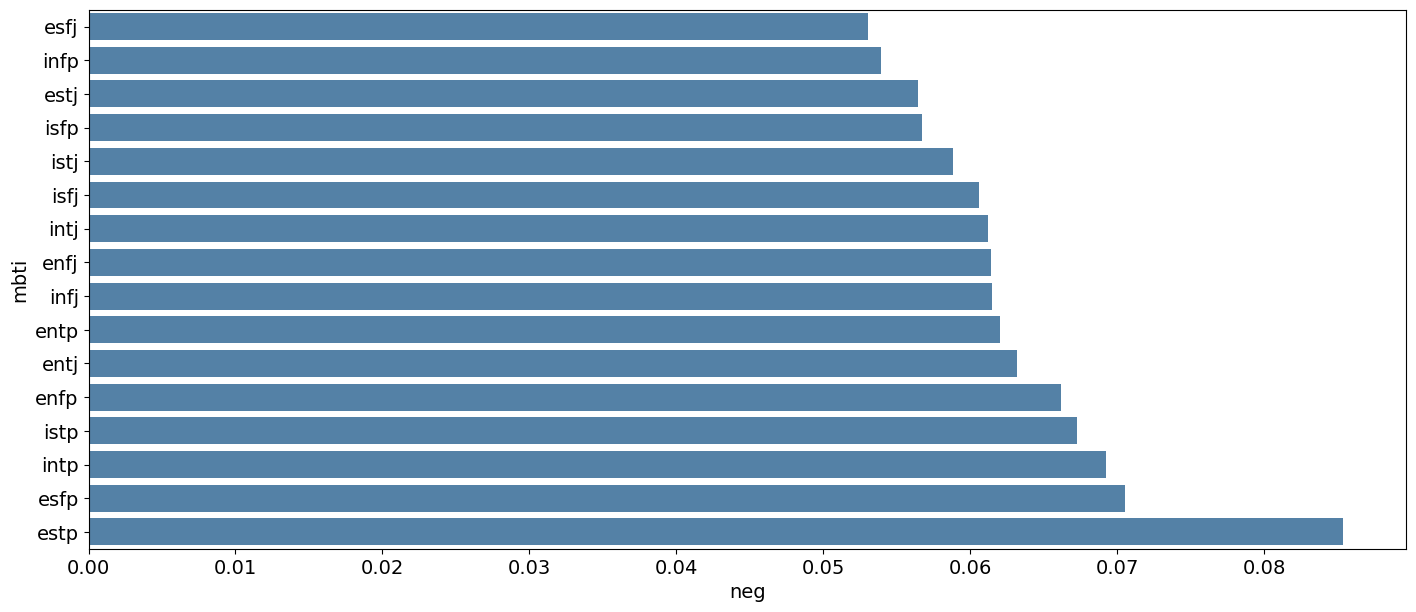

In [57]:
# plot for negative sentiment metric

df_neg = df_sentiment.sort_values(by = 'neg')
mbti_neg = sns.barplot(data = df_neg, y = 'mbti_personality', x = 'neg', color = 'steelblue');
mbti_neg.set(ylabel='mbti');

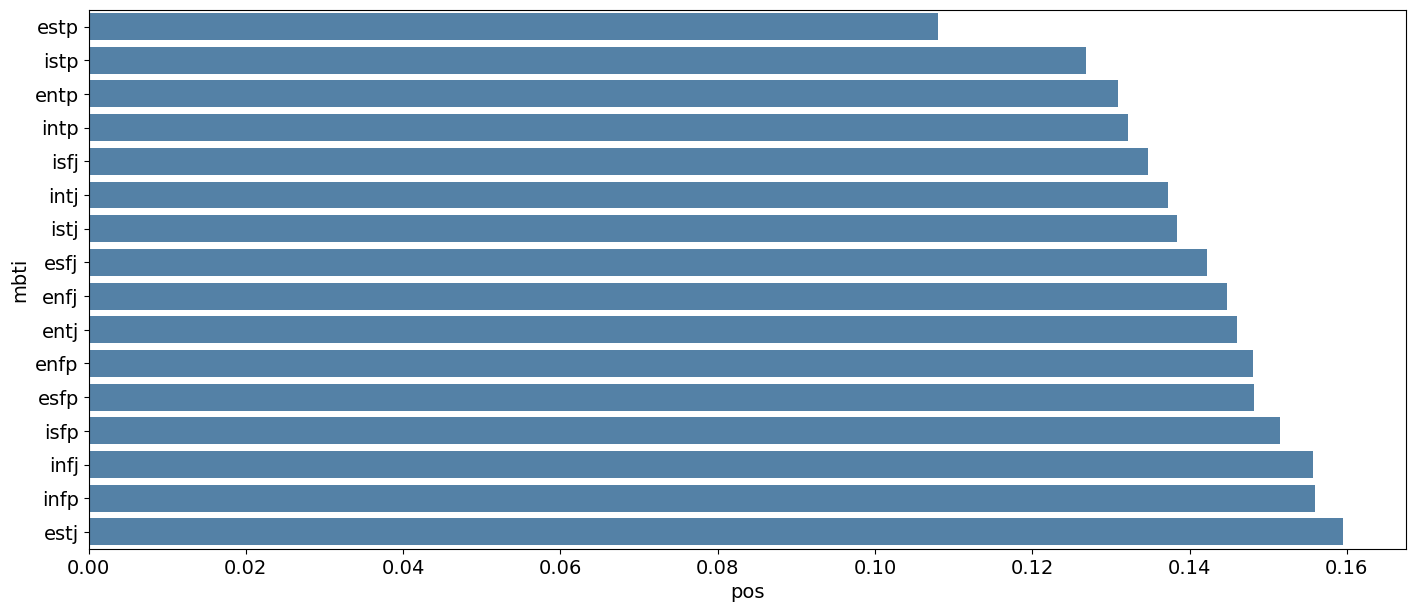

In [58]:
# plot for positive sentiment metric

df_pos = df_sentiment.sort_values(by = 'pos')
mbti_pos = sns.barplot(data = df_pos, y = 'mbti_personality', x = 'pos', color = 'steelblue');
mbti_pos.set(ylabel='mbti');

From the first plot, we can see that the tweets of users who classify as ESTP have a significantly higher negative sentiment metric than tweets from users of other MBTIs. In this plot we can also see that tweets from ESFJ and INFP have the lowest negative sentiment metric. From the second plot, we see that tweets of users who classify as ESTJ and INFP have the highest positive sentiment metric, but the difference is not as stark as in the first plot. We can also note that ESTP user tweets have the lowest positive sentiment metric in the second plot. From these results, particularly the ESTP metrics, we believe there may be a relationship between MBTI type and text content of their tweets that we can further explore.

**STEP 5**

Next, we will continue cleaning the text data in order to remove emojis and apply stop words. This is necessary to analyze the word frequency distribution of each MBTI type. The function to clean emojis is `clean` from the the `clean-text` package, which also handles deletion of punctuation and changing all words to lower case. For stop words, we import `stopwords` from `nltk.corpus`. 

In [59]:
# function to delete emojis 
# utilizes `clean` function from clean-text package

def remove_emoj(lst):
    # delete emojis and punctuation, but keep the original case of the words
    for i in range(len(lst)):
        lst[i] = clean(lst[i], no_emoji = True, no_punct = True)
    
    return lst

In [60]:
# apply remove_emoj function to token columns

for i in range(5):
    df1['token_' + str(i+1)] = df1['token_' + str(i+1)].apply(remove_emoj)

df1.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,token_1,token_2,token_3,token_4,token_5
1,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,"[, , exolselcaday]","[when, is, this, from, , , , ]","[since, we, re, talking, about, suh, , a, frie...","[i, am, supporting, this, fundraising, page, a...","[sun, and, moon, outfits]"
2,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",RT @KW33NSOHI9H: I grew up and still have mome...,"[the, media, are, just, feeding, fear, over, t...","[how, my, mother, feels, about, these, cheap, ...","[i, know, now, , as, an, adult, , it, , s, my,...","[in, the, right, now, , i, know, that, you, ne...","[i, grew, up, and, still, have, moments, of, t..."
3,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,RT @thespinsterymc: Dear ableds: Panic buying ...,"[, supergirl, really, missed, the, mark, with,...","[wild, how, most, of, the, media, response, to...","[let, it, be, known, that, these, are, the, ha...","[the, ultimate, ghost, pokemon, got, ghosted, ...","[dear, ableds, , panic, buying, is, not, going..."
4,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",RT @CeeHawk: Ministry of Darkness but the Supr...,"[comic, view, on, bet, , comin, , at, you, six...","[kids, are, observant, and, intelligent, when,...",[],"[if, you, are, reading, this, , you, have, mad...","[ministry, of, darkness, but, the, supremacy, ..."
5,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,RT @_ReaalAmerican_: @GOP @Mike_Pence https://...,"[, resigntrump]","[this, was, from, data, is, beautiful, on, red...","[you, have, to, read, this, , , , , biden2020]","[take, my, vitamins, , amp, , every, natural, ...",[]


In [61]:
# function to delete '' (empty space) that the `clean` function puts in place of 
# removed emojis

def remove_space(lst):
    # delete empty spaces
    i = 0
    while i < len(lst):
        if lst[i] == '':
            del lst[i]
        else:
            i += 1
    
    return lst

In [62]:
# apply remove_space function to token columns

for i in range(5):
    df1['token_' + str(i+1)] = df1['token_' + str(i+1)].apply(remove_space)
    
df1.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,token_1,token_2,token_3,token_4,token_5
1,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,[exolselcaday],"[when, is, this, from]","[since, we, re, talking, about, suh, a, friend...","[i, am, supporting, this, fundraising, page, a...","[sun, and, moon, outfits]"
2,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",RT @KW33NSOHI9H: I grew up and still have mome...,"[the, media, are, just, feeding, fear, over, t...","[how, my, mother, feels, about, these, cheap, ...","[i, know, now, as, an, adult, it, s, my, respo...","[in, the, right, now, i, know, that, you, need...","[i, grew, up, and, still, have, moments, of, t..."
3,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,RT @thespinsterymc: Dear ableds: Panic buying ...,"[supergirl, really, missed, the, mark, with, k...","[wild, how, most, of, the, media, response, to...","[let, it, be, known, that, these, are, the, ha...","[the, ultimate, ghost, pokemon, got, ghosted, ...","[dear, ableds, panic, buying, is, not, going, ..."
4,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",RT @CeeHawk: Ministry of Darkness but the Supr...,"[comic, view, on, bet, comin, at, you, six, ni...","[kids, are, observant, and, intelligent, when,...",[],"[if, you, are, reading, this, you, have, made,...","[ministry, of, darkness, but, the, supremacy, ..."
5,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,RT @_ReaalAmerican_: @GOP @Mike_Pence https://...,[resigntrump],"[this, was, from, data, is, beautiful, on, red...","[you, have, to, read, this, biden2020]","[take, my, vitamins, amp, every, natural, immu...",[]


In [63]:
# import stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# look at stop words

print(stop_words)

{"she's", 'your', 'between', 'other', "shan't", 'an', 'having', "hadn't", 'my', 'were', "haven't", "wouldn't", 'again', 'she', 'all', 'doing', 'but', 'more', 'its', 'what', 'they', 'didn', 'doesn', 'by', "weren't", 'why', 'further', 'himself', 'both', 'while', 'for', "you'd", 'the', 'in', 'if', 'be', 'have', 'this', 'theirs', 'below', 'needn', "don't", 't', 'll', 'ma', 'our', 'because', 'own', 'off', 'than', 'ours', 'from', 'down', 'through', 'had', 'them', 'themselves', 'myself', 'i', 'is', 'isn', 'mustn', 'it', 'his', "should've", "couldn't", 'hers', 'to', 'hasn', 'not', 'o', 'am', 'just', 'too', 'y', 'do', 'yourself', 'been', 'or', 'during', 'aren', "needn't", 'over', 'was', 'haven', 'now', 'who', 'with', 'of', 'should', "aren't", 'are', 'hadn', 'being', 'herself', 'and', "hasn't", "that'll", 'a', 'me', 'itself', 'how', "you're", 'don', 'couldn', 'yourselves', 'shan', 'weren', 've', 'those', "mightn't", 'which', 'that', 'above', 'wouldn', "mustn't", 'under', 'then', 'after', 'so', '

In [64]:
# function to delete stopwords

def remove_stop(lst):
    # remove words from the list that are in stopwords
    new_lst = []
    for i in range(len(lst)):
        if lst[i] not in stop_words:
            new_lst.append(lst[i])
    
    return new_lst

In [65]:
# apply remove_stop function to token columns

for i in range(5):
    df1['token_' + str(i+1) + '_stop'] = df1['token_' + str(i+1)].apply(remove_stop)

df1.head()

,id,mbti_personality,average_mentions_count,average_tweet_length,average_media_count,average_retweet_count,tweet_1,tweet_2,tweet_3,tweet_4,...,token_1,token_2,token_3,token_4,token_5,token_1_stop,token_2_stop,token_3_stop,token_4_stop,token_5_stop
1,907848145,infp,0.906250,14.718750,0.401042,10028.718750,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,...,[exolselcaday],"[when, is, this, from]","[since, we, re, talking, about, suh, a, friend...","[i, am, supporting, this, fundraising, page, a...","[sun, and, moon, outfits]",[exolselcaday],[],"[since, talking, suh, friendly, reminder, like...","[supporting, fundraising, page, thought, might...","[sun, moon, outfits]"
2,97687049,infp,0.959391,16.380711,0.167513,6716.137056,RT @KingKamale: The media are just feeding fea...,RT @cinderCHERELla: How my mother feels about ...,"RT @KW33NSOHI9H: I know now, as an adult, it’s...","RT @KW33NSOHI9H: In the right now, I know that...",...,"[the, media, are, just, feeding, fear, over, t...","[how, my, mother, feels, about, these, cheap, ...","[i, know, now, as, an, adult, it, s, my, respo...","[in, the, right, now, i, know, that, you, need...","[i, grew, up, and, still, have, moments, of, t...","[media, feeding, fear, coronavirus, tell, us, ...","[mother, feels, cheap, flights]","[know, adult, responsibility, balance, respons...","[right, know, need, people, also, know, people...","[grew, still, moments, telling, people, feelin..."
3,63170384,infp,0.690000,11.770000,0.220000,3722.910000,RT @Hypable: #Supergirl really missed the mark...,RT @karazrell: Wild how most of the media resp...,RT @livefortheapple: Let it be known that thes...,RT @paoloumpa: The ultimate ghost Pokemon got ...,...,"[supergirl, really, missed, the, mark, with, k...","[wild, how, most, of, the, media, response, to...","[let, it, be, known, that, these, are, the, ha...","[the, ultimate, ghost, pokemon, got, ghosted, ...","[dear, ableds, panic, buying, is, not, going, ...","[supergirl, really, missed, mark, kara, lena, ...","[wild, media, response, karawilliam, debacle, ...","[let, known, half, hours, lost, almost, 100k, ...","[ultimate, ghost, pokemon, got, ghosted, one, ...","[dear, ableds, panic, buying, going, protect, ..."
4,33811202,infp,0.454082,12.760204,0.117347,2374.331633,"RT @CreoleBabyBritt: 🎶Comic View on BET, comin...",@EmpressMoe_ Kids are observant and intelligen...,RT @TheEnemiesPod: https://t.co/jgOO3plnwL,"If you are reading this, you have made it thru...",...,"[comic, view, on, bet, comin, at, you, six, ni...","[kids, are, observant, and, intelligent, when,...",[],"[if, you, are, reading, this, you, have, made,...","[ministry, of, darkness, but, the, supremacy, ...","[comic, view, bet, comin, six, nights, week, g...","[kids, observant, intelligent, want, something]",[],"[reading, made, thru, today, congratulations, ...","[ministry, darkness, supremacy, whiteness]"
5,236506960,infp,1.655000,15.470000,0.125000,1087.200000,RT @A4Ny14: #ResignTrump https://t.co/8HyMJXzPAb,RT @GoddessOfFireB: This was from data is beau...,RT @NYCanegirl: YOU HAVE TO READ THIS!!! \n#Bi...,@fras99 Take my vitamins &amp; every natural i...,...,[resigntrump],"[this, was, from, data, is, beautiful, on, red...","[you, have, to, read, this, biden2020]","[take, my, vitamins, amp, every, natural, immu...",[],[resigntrump],"[data, beautiful, reddit, sure, accurate, trul...","[read, biden2020]","[take, vitamins, amp, every, natural, immune, ...",[]


**STEP 6**

Finally, we compute and plot the frequency distribution of words in our text data for each MBTI. We want to investigate if there exists any possible trends in the 20 most common words used by each MBTI type and if there are any unique words that only one (or very few) of the types use frequently. 

In [66]:
from nltk.probability import FreqDist
import string

In [67]:
# combine all tokens for each user

df1['merged_tokens'] = df1['token_1_stop']
for i in range(4):
    df1['merged_tokens'] += df1['token_' + str(i+2) + '_stop']

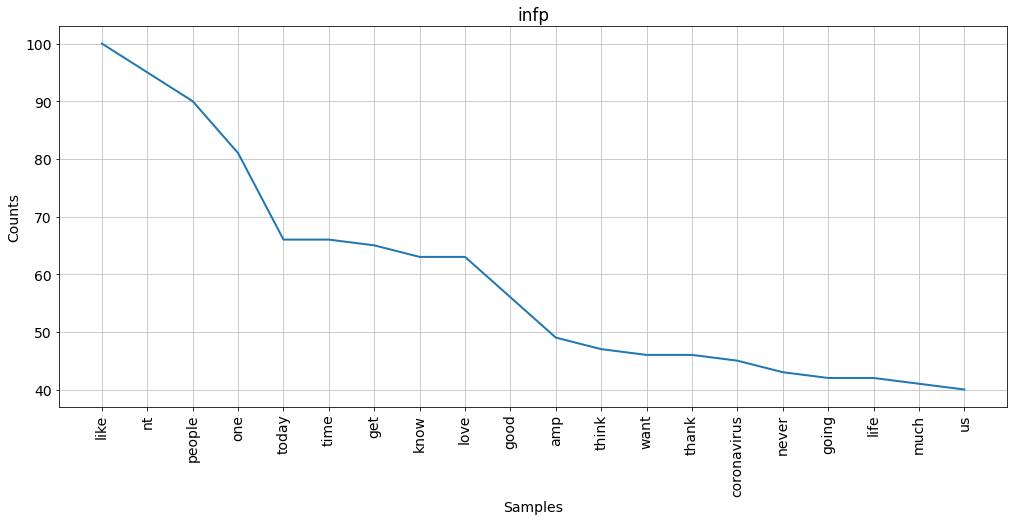

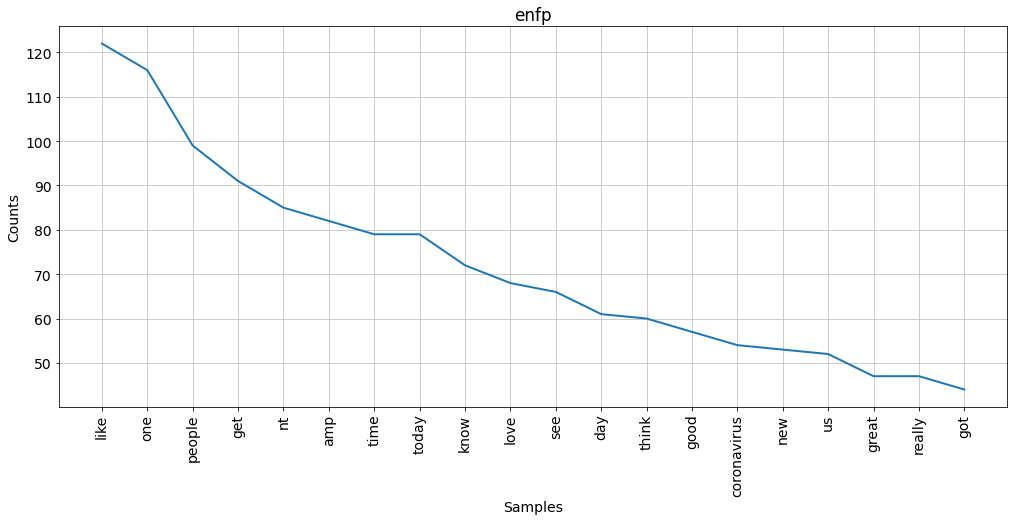

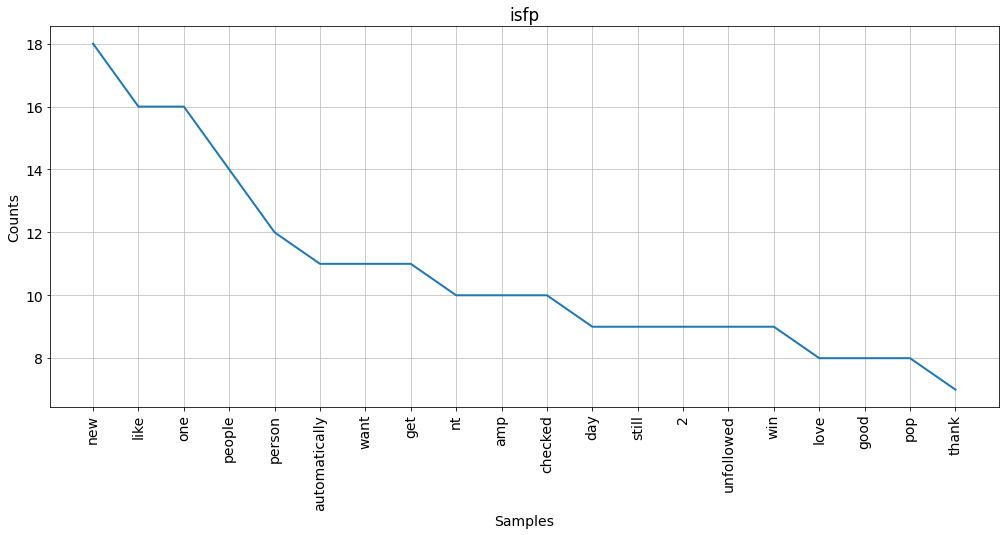

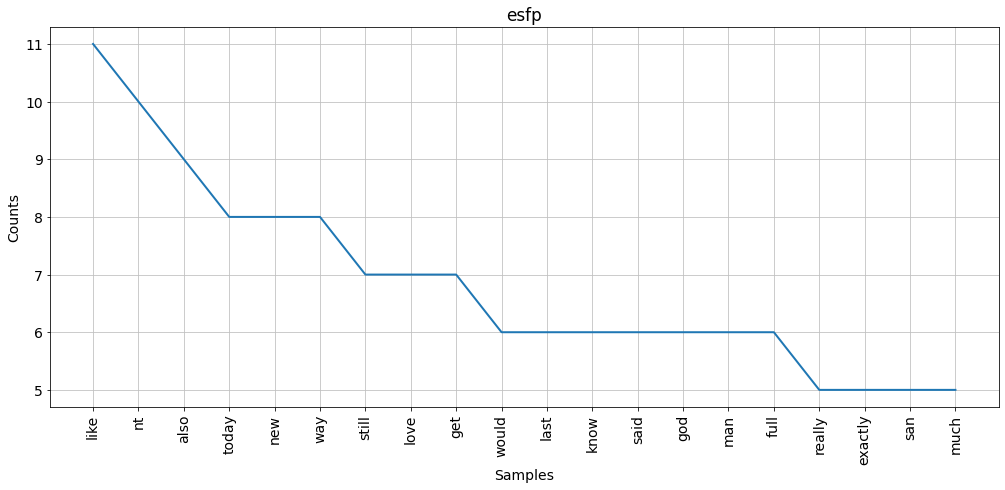

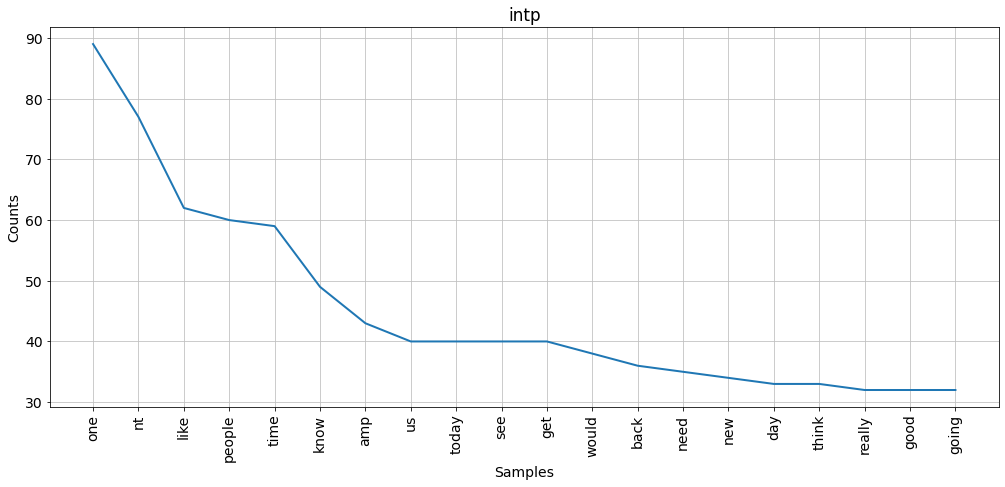

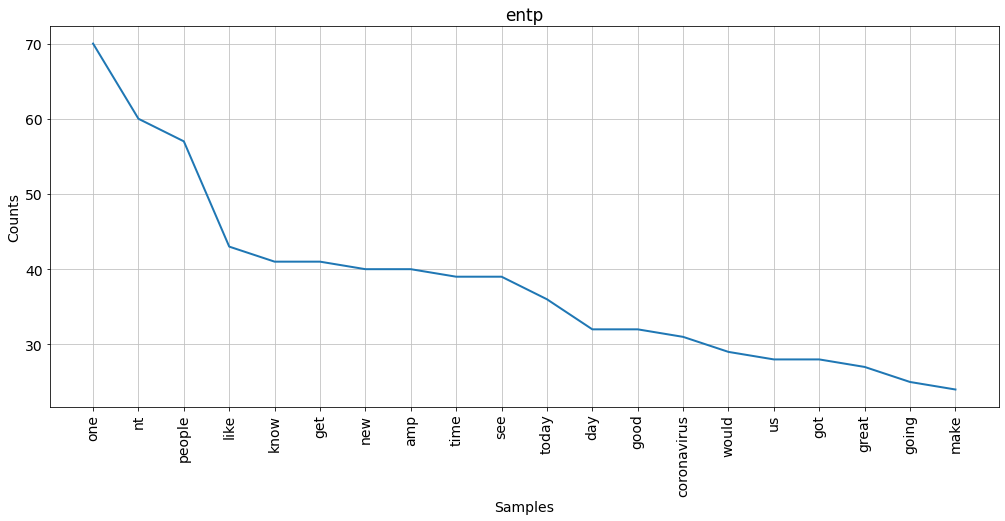

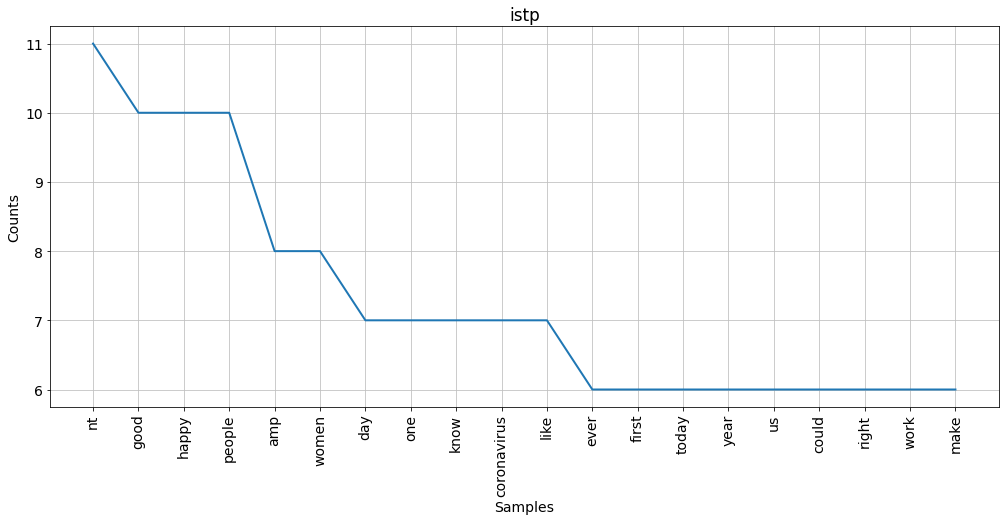

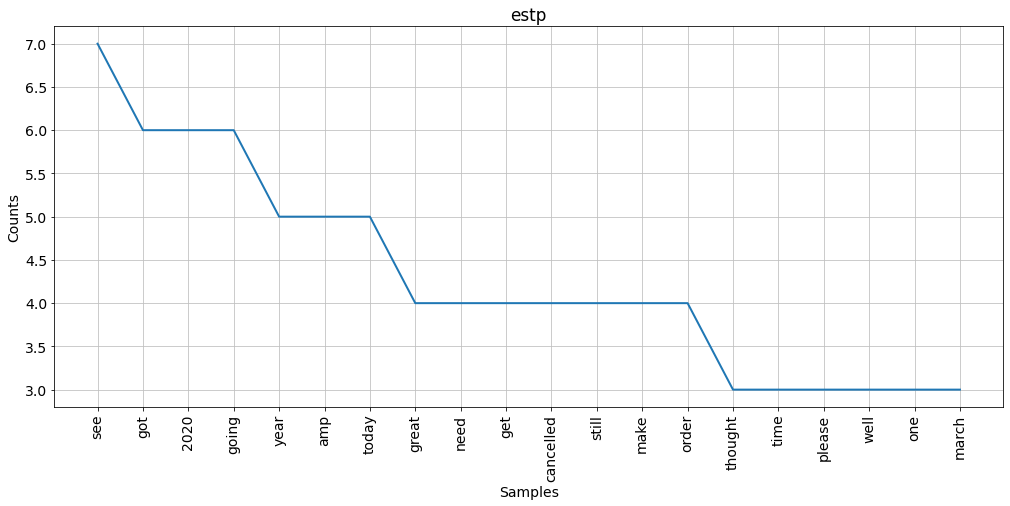

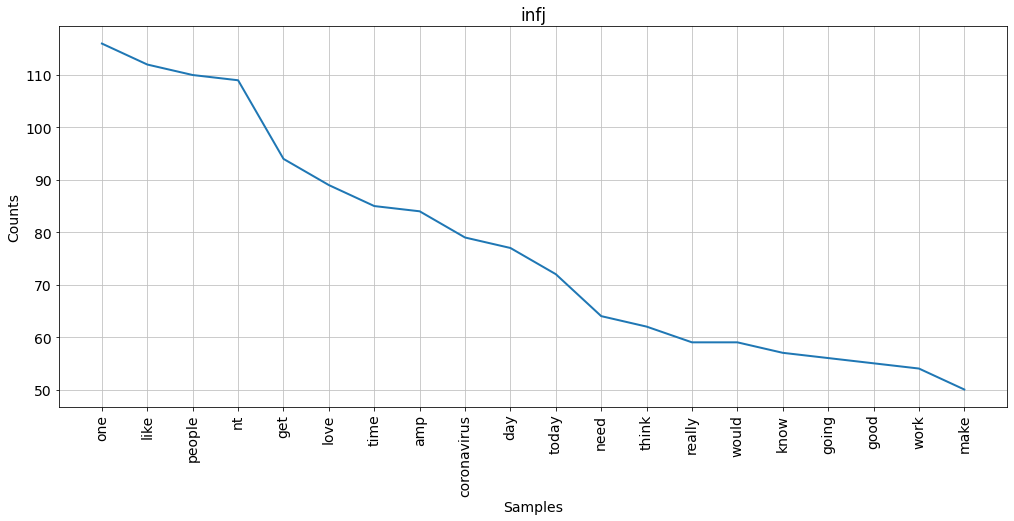

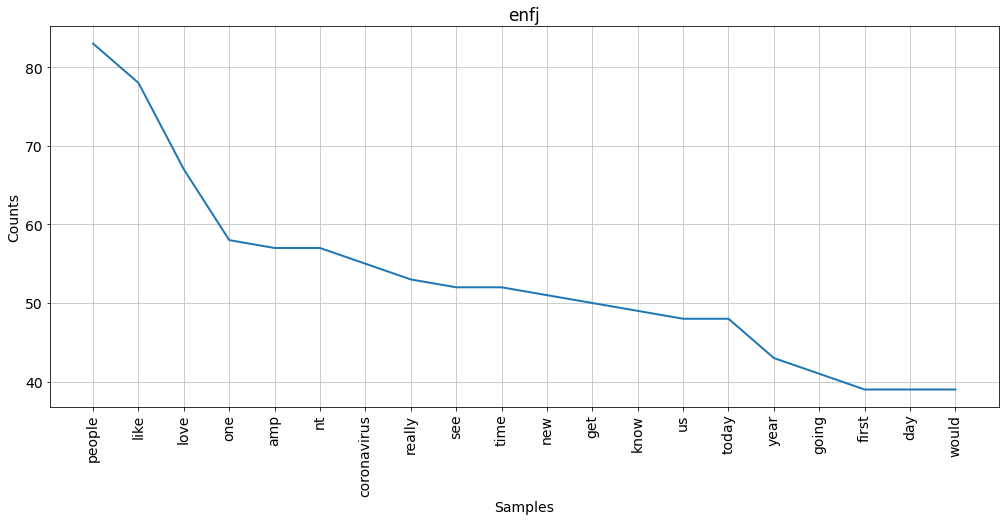

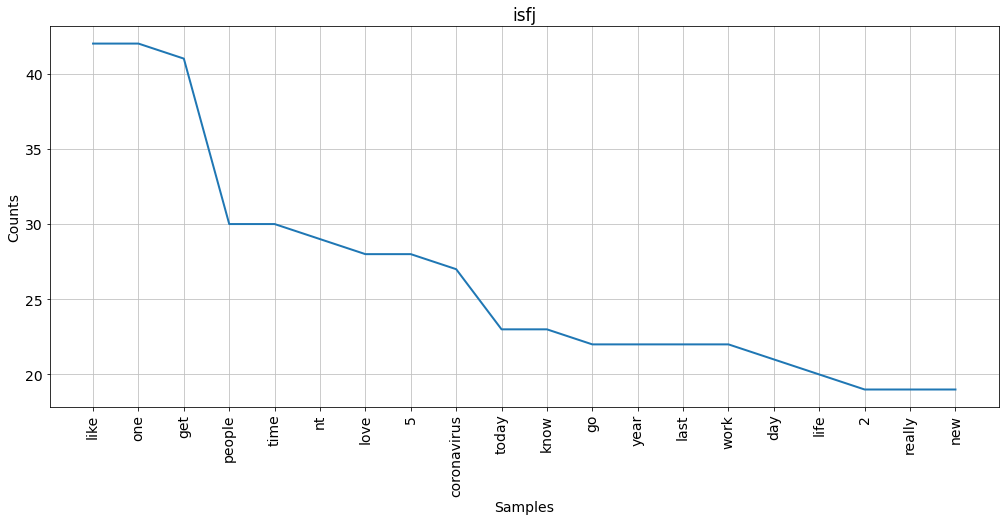

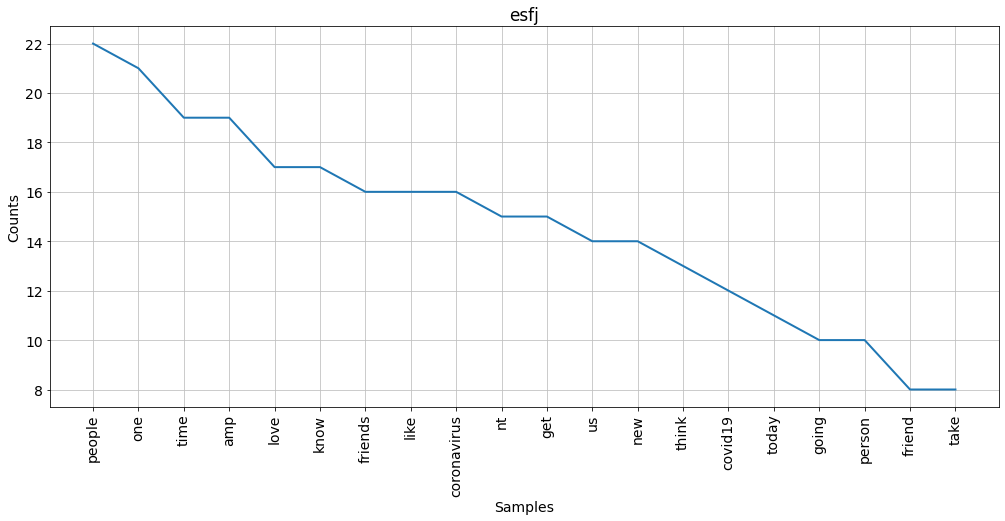

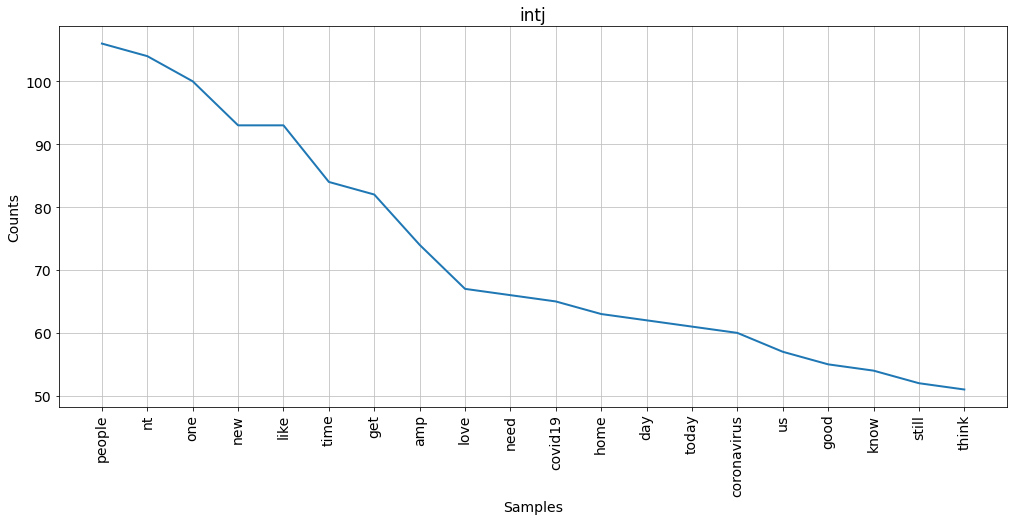

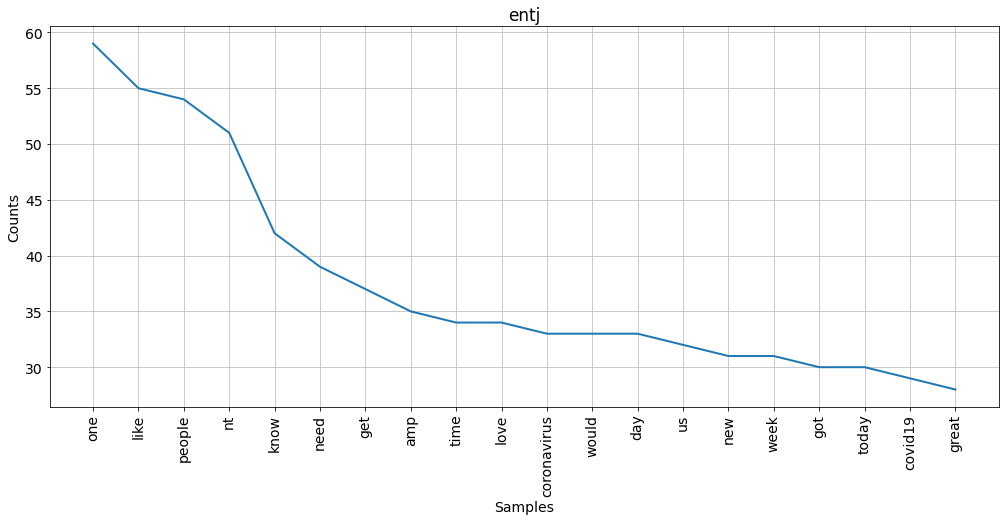

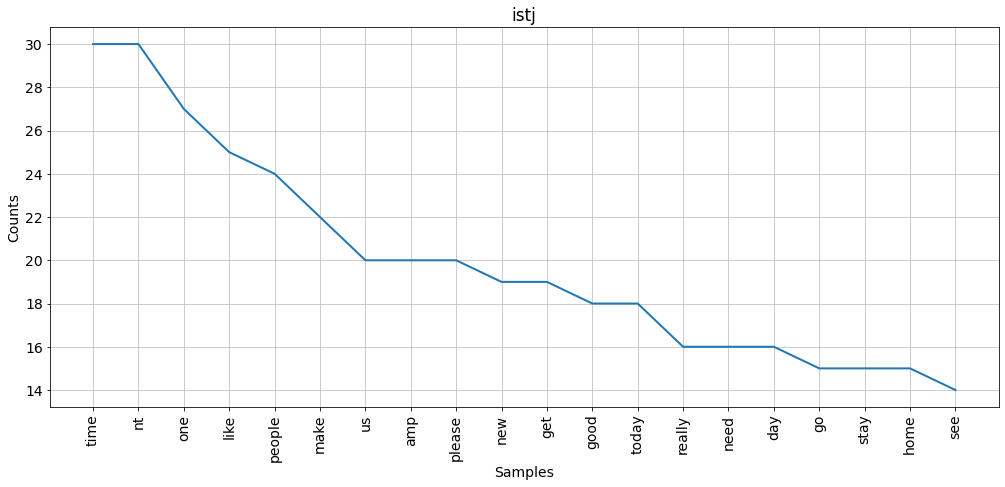

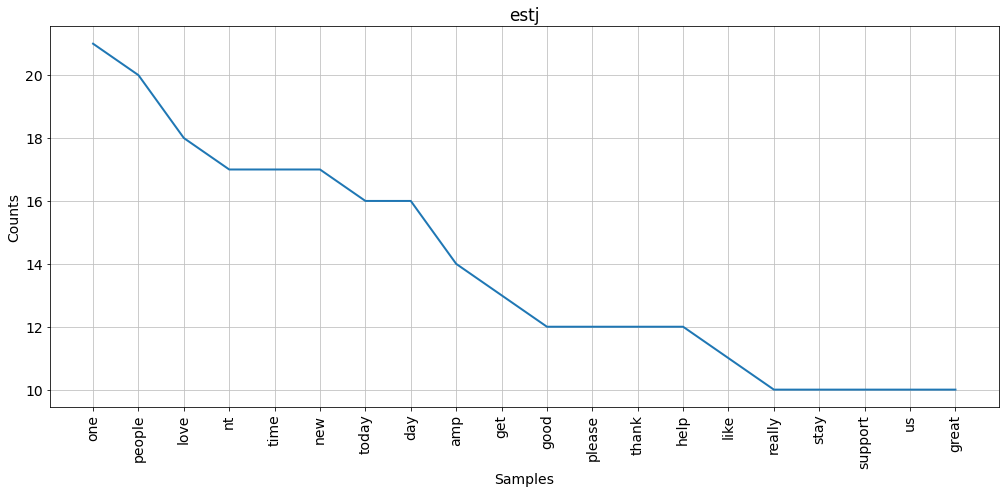

In [68]:
mbti_lst = df1['mbti_personality'].unique()

for i in range(len(mbti_lst)):
    df_sub = df1[df['mbti_personality'] == mbti_lst[i]]
    word_count = df_sub['merged_tokens'].apply(pd.Series).stack()
    
    # calculation word frequency
    fdist_sub = FreqDist(word_count)

    # remove punctuation counts
    for punc in string.punctuation:
        del fdist_sub[punc]
        
    fdist_sub.plot(20, cumulative=False, title = mbti_lst[i]);

From the frequency distributions graphs above, we notice that the 3 MBTI types with the highest positive sentiment metric (ESTJ, INFP, and INFJ) all have the words 'like', 'love',  'good' in their top 20 most frequent words. ESTP, which had the highest negative sentiment metric, was the only type with the word 'cancelled' in their most frequent words. In addition, we noticed that all the other MBTI personality types had "one" and "like" in their top 5 most used words except for ISTP and ESTP personality types. Then ESTJ just had "one" as their most used word but "like" in their least used. Overall, most of the types shared similar most frequent words, which is expected due to the nature of the English language. However, the plots show us that each type has certain unique words that may not found in other types' plots. For example, ISTP is the only type with 'automatically' as one of their most frequent words, and ranked 6th as well; ISTP also has 'unfollowed' in their rankings, which is not in any other plot. In addition, ISTJ is the only type to have 'twitter' in their rankings, and ESTJ is the only type to have 'support' in their rankings. Thus, from these plots we can confirm that certain unique words are used by only some of the types, which is useful if attempting to build a model to predict MBTI based on text content.

## Analysis

Now that we have explored the data, we will creating a model that takes in an individual's tweets and predicts their MBTI. We will be using a linear Support Vector Machine (SVM) to train and predict our model, as we did in several Natural Language Processing (NLP) demonstrations from this course. SVM is a widely used machine learning algorithm that is used for both classification and regression models. In our case, we will be using SVM to perform sentiment analysis on text (tweet content) and predicting a label/group (MBTI). For the vectorizer, we will be using the Term Frequency - Inverse Document Frequency (TF-IDF) approach instead of the Bag of Words (BoW) approach since we want to factor in the uniqueness of the words used, as opposed to having each word weighted the same in our analysis. In the following section, we will also create several other different prediction models using SVM to see which performs the best.

### I. Prediction model using tweets

**STEP 1**

We create a TF-IDF vectorizer to transform the tweets into numerical matricies that will be used by SVM. We set the max featrues to 2000, which indicates that 2000 unique English words will be considered in the model. We also create the training and testing sets using an 80/20 split. 

We note that all five tweets for each user are first combined into a single string before applying the vectorizer. The merging of tweets simplifies the operation while still maintaining the same amount of content per user. Again, as stated above, X is the vectorized tweet data and Y is the MBTI classification.

In [69]:
# subset df1 to include only the `mbti` column and the clean_tweet_# columns

df_predict = df1[['id', 'mbti_personality', 'merged_tokens']]

In [70]:
# combine all the text in `merged_tokens`

df_predict['merged_tweets'] = df_predict['merged_tokens'].apply(concat_token)

In [71]:
# drop `merged_tokens` column for easier viewing

df_predict = df_predict.drop(columns = ['merged_tokens'])
df_predict

,id,mbti_personality,merged_tweets
1,907848145,infp,exolselcaday since talking suh friendly remind...
2,97687049,infp,media feeding fear coronavirus tell us amount ...
3,63170384,infp,supergirl really missed mark kara lena episode...
4,33811202,infp,comic view bet comin six nights week getcha la...
5,236506960,infp,resigntrump data beautiful reddit sure accurat...
...,...,...,...
3482,3095624063,estj,omg wonderful match congrats kev terrific news...
3483,790650559086854144,estj,come put wrong email made recent order track o...
3484,52277872,estj,mozillalifeboat hiring across bunch department...
3485,489644768,estj,story soulcycle stopped innovating amp focused...


In [72]:
# scikit-learn imports

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [73]:
# make tfidf vectorizer

tfidf = TfidfVectorizer(sublinear_tf = True, analyzer = 'word', 
                       max_features = 2000, tokenizer = word_tokenize)

In [74]:
# vectorize tweets and get outcome variable as np.array

tweet_X = tfidf.fit_transform(df_predict['merged_tweets']).toarray()
tweet_Y = df_predict['mbti_personality'].to_numpy()

In [75]:
# train and test sets

tweet_train_X, tweet_test_X, tweet_train_Y, tweet_test_Y = train_test_split(tweet_X, tweet_Y, test_size = 0.2, random_state = 100)


**STEP 2**

We initialize and train the SVM classifier. We then run the prediction model on both the training set and the test set using the `predict` function of on the classifier.

In [76]:
# function that initializes SVM classifier and trains it

def train_SVM(X, y, kernel='linear'):
    
    clf = SVC(kernel = kernel)
    clf.fit(X, y)
    return clf

In [77]:
# train SVM

tweet_clf = train_SVM(tweet_train_X, tweet_train_Y)

In [78]:
# use model to predict

tweet_predicted_train_Y = tweet_clf.predict(tweet_train_X)
tweet_predicted_test_Y = tweet_clf.predict(tweet_test_X)

In [79]:
# training-set result

print(classification_report(tweet_train_Y, tweet_predicted_train_Y))

              precision    recall  f1-score   support

        enfj       0.74      0.78      0.76       262
        enfp       0.63      0.87      0.73       334
        entj       0.88      0.67      0.76       208
        entp       0.98      0.48      0.64       181
        esfj       1.00      0.19      0.32        63
        esfp       1.00      0.08      0.14        39
        estj       1.00      0.44      0.61        70
        estp       1.00      0.05      0.10        20
        infj       0.55      0.96      0.70       403
        infp       0.73      0.79      0.76       308
        intj       0.68      0.89      0.77       367
        intp       0.93      0.65      0.77       233
        isfj       1.00      0.37      0.54       123
        isfp       1.00      0.08      0.15        51
        istj       1.00      0.28      0.44        89
        istp       1.00      0.05      0.10        37

    accuracy                           0.70      2788
   macro avg       0.88   

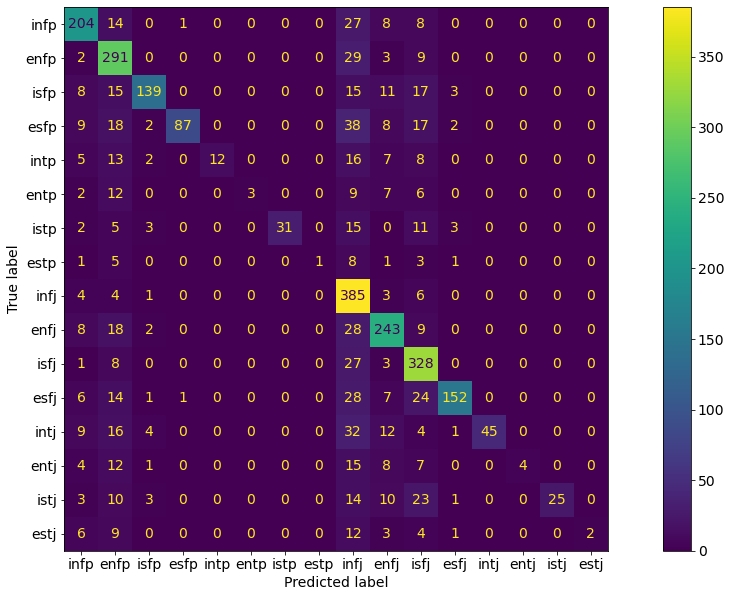

In [80]:
mbtis = df_predict.mbti_personality.unique().tolist()

conf_mat_train = confusion_matrix(tweet_train_Y, tweet_predicted_train_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_train, display_labels = mbtis).plot();
fig = disp.figure_
fig.set_figwidth(20)
fig.set_figheight(10) 

In [81]:
# test-set result

print(classification_report(tweet_test_Y, tweet_predicted_test_Y))

              precision    recall  f1-score   support

        enfj       0.17      0.16      0.17        61
        enfp       0.24      0.34      0.28        94
        entj       0.20      0.11      0.14        37
        entp       0.30      0.05      0.08        62
        esfj       0.00      0.00      0.00        16
        esfp       0.00      0.00      0.00         7
        estj       0.00      0.00      0.00        14
        estp       0.00      0.00      0.00         6
        infj       0.16      0.44      0.23        85
        infp       0.19      0.20      0.20        80
        intj       0.20      0.33      0.25        88
        intp       0.28      0.08      0.13        60
        isfj       0.00      0.00      0.00        37
        isfp       0.00      0.00      0.00         9
        istj       0.00      0.00      0.00        36
        istp       0.00      0.00      0.00         6

    accuracy                           0.19       698
   macro avg       0.11   

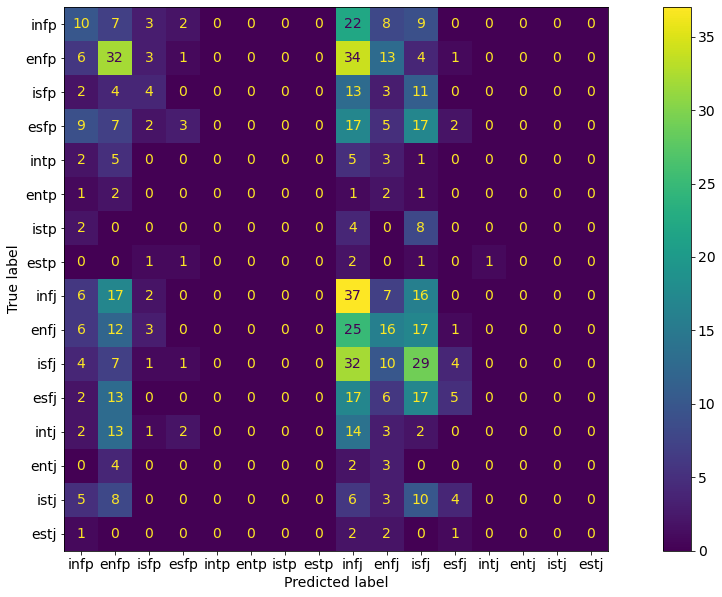

In [82]:
conf_mat_test = confusion_matrix(tweet_test_Y, tweet_predicted_test_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_test, display_labels = mbtis).plot();
fig = disp.figure_
fig.set_figwidth(20)
fig.set_figheight(10)

For the prediction on the training set, we achieved an accuracy of 70%. For the prediction on the test set, we achieved an accuracy of 19%. Both percentages are not very high. We believe that the model does not perform well because several types in the dataset do not have very many observations when compared to other types. We see from the `support` column of both classification reports that certain types are very underrepresented in both sets, which is a direct result of the discrepency in the distribution of the MBTI types in our cleaned data set. From the test set's classification report, we see that the model did not classify any observations into the categories whose support is less than 50 observations. 

We can see visually that our model performs poorly by looking along the diagonal of the test set confusion matrix. Ideally, we want to have the diagonal be mostly yellow, which indicates that the model correctly predicts the types (true positives); we also wnat the areas not along the diagonal to all be purple, which indicates that the model does not incorrectly categorize types.

However, while the training set confusion matrix appears to be somewhat following this ideal trend, this is not the case with the test set confusion matrix. From the second plot, when we look at the vertical columns of the test set confusion matrix we can see that the model tends to classify tweets as one of the 5 types with the most observations in the dataset (INFP, ENFP, INFJ, ENFJ, ISFJ). The model barely classifies any tweets as one of the types with very little observations in the dataset, which is to be expected since the corpus for the model to learn from is smaller for these types. This results in low prediction accuracy, as we see in the classification report. 

### II. Prediction model using tweets & numerical features

**STEP 1**

We now want to see if we can improve our model by adding the numerical features of `average_media_count` and `average_retweet_count` as part of the X variable along with the tweets. We normalize the two numerical variables using a `MinMaxScalar()` so that these features are scaled appropriately when they are added to the vectorized tweets matrix. We then apply the `tfidf` vectorizer as we did above, which creates matrix representation of the tweets, and the `hpstack` this `np.array` with the `np.array` containing the scaled numerical features.

In [83]:
# subset df1 to include only the `mbti` column, the `merged_tokens` column, and the columns containing the numerical features we are interested in

df_number = df1[['id', 'mbti_personality', 'average_media_count', 'average_retweet_count', 'merged_tokens']]
df_number['merged_tweets'] = df_number['merged_tokens'].apply(concat_token)
df_number = df_number.drop(columns = ['merged_tokens'])

df_number.head()

,id,mbti_personality,average_media_count,average_retweet_count,merged_tweets
1,907848145,infp,0.401042,10028.718750,exolselcaday since talking suh friendly remind...
2,97687049,infp,0.167513,6716.137056,media feeding fear coronavirus tell us amount ...
3,63170384,infp,0.220000,3722.910000,supergirl really missed mark kara lena episode...
4,33811202,infp,0.117347,2374.331633,comic view bet comin six nights week getcha la...
5,236506960,infp,0.125000,1087.200000,resigntrump data beautiful reddit sure accurat...


In [84]:
# vectorize tweets (same as before) and get outcome variable as np.array

X = tfidf.fit_transform(df_number['merged_tweets']).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23214821, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.3558092 ,
        0.        ]])

In [85]:
# get the numerical features as np.array

numerical = df_number[['average_media_count', 'average_retweet_count']].to_numpy()
numerical

array([[4.01041667e-01, 1.00287188e+04],
       [1.67512690e-01, 6.71613706e+03],
       [2.20000000e-01, 3.72291000e+03],
       ...,
       [0.00000000e+00, 3.35000000e-01],
       [3.51758794e-02, 7.14974874e+01],
       [7.33944954e-02, 4.01192661e+01]])

In [86]:
# normalize the numerical variables

mms = MinMaxScaler()
numbers = mms.fit_transform(numerical)

In [87]:
# hpstack the 2 np.arrays to combine; each inner list contains the information of a single user

X_new = np.hstack((X, numbers))
Y = df_number['mbti_personality'].to_numpy()

X_new

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.89075203e-01, 7.40929685e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.04283769e-01, 4.96193525e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.68292683e-01, 2.75051540e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.47500653e-06],
       [2.32148208e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.28974139e-02, 5.28229100e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.95054822e-02, 2.96404315e-04]])

**STEP 2**

We split the data into training and test sets, as we did with the previous model. We also train the SVM and predict the same way we did with the model above.

In [88]:
# train and test sets

num_train_X, num_test_X, num_train_Y, num_test_Y = train_test_split(X_new, Y, test_size = 0.2, random_state = 100)

# clf

num_clf = train_SVM(num_train_X, num_train_Y)

# predict 

num_predicted_train_Y = num_clf.predict(num_train_X)
num_predicted_test_Y = num_clf.predict(num_test_X)

In [89]:
# training-set result

print(classification_report(num_train_Y, num_predicted_train_Y))

              precision    recall  f1-score   support

        enfj       0.75      0.76      0.75       262
        enfp       0.62      0.85      0.72       334
        entj       0.86      0.68      0.76       208
        entp       0.98      0.50      0.66       181
        esfj       1.00      0.19      0.32        63
        esfp       1.00      0.08      0.14        39
        estj       1.00      0.41      0.59        70
        estp       1.00      0.05      0.10        20
        infj       0.57      0.95      0.71       403
        infp       0.68      0.80      0.74       308
        intj       0.69      0.91      0.78       367
        intp       0.90      0.66      0.76       233
        isfj       1.00      0.41      0.58       123
        isfp       1.00      0.08      0.15        51
        istj       1.00      0.28      0.44        89
        istp       1.00      0.05      0.10        37

    accuracy                           0.70      2788
   macro avg       0.88   

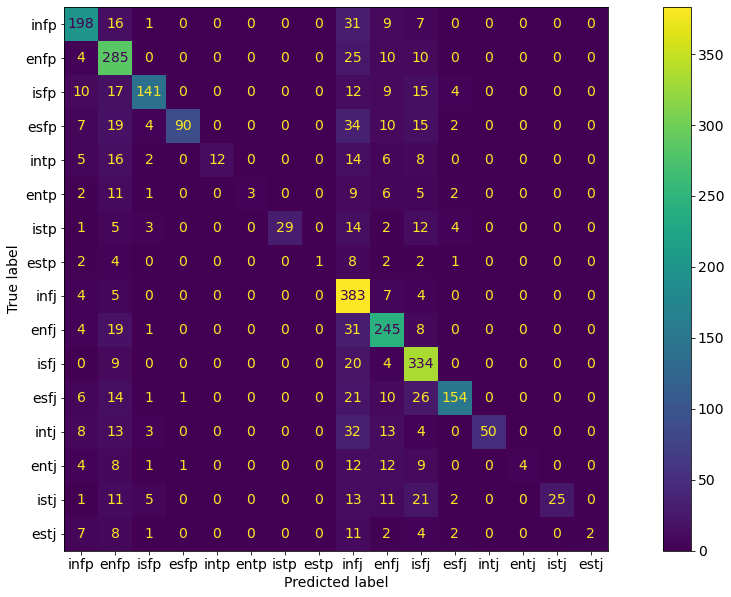

In [90]:
conf_mat_train = confusion_matrix(num_train_Y, num_predicted_train_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_train, display_labels = mbtis).plot();
fig = disp.figure_
fig.set_figwidth(20)
fig.set_figheight(10) 

In [91]:
# test-set result

print(classification_report(num_test_Y, num_predicted_test_Y))

              precision    recall  f1-score   support

        enfj       0.11      0.10      0.10        61
        enfp       0.23      0.33      0.27        94
        entj       0.14      0.11      0.12        37
        entp       0.33      0.05      0.08        62
        esfj       0.00      0.00      0.00        16
        esfp       0.00      0.00      0.00         7
        estj       0.00      0.00      0.00        14
        estp       0.00      0.00      0.00         6
        infj       0.14      0.39      0.21        85
        infp       0.16      0.16      0.16        80
        intj       0.22      0.34      0.27        88
        intp       0.24      0.08      0.12        60
        isfj       0.00      0.00      0.00        37
        isfp       0.00      0.00      0.00         9
        istj       0.00      0.00      0.00        36
        istp       0.00      0.00      0.00         6

    accuracy                           0.18       698
   macro avg       0.10   

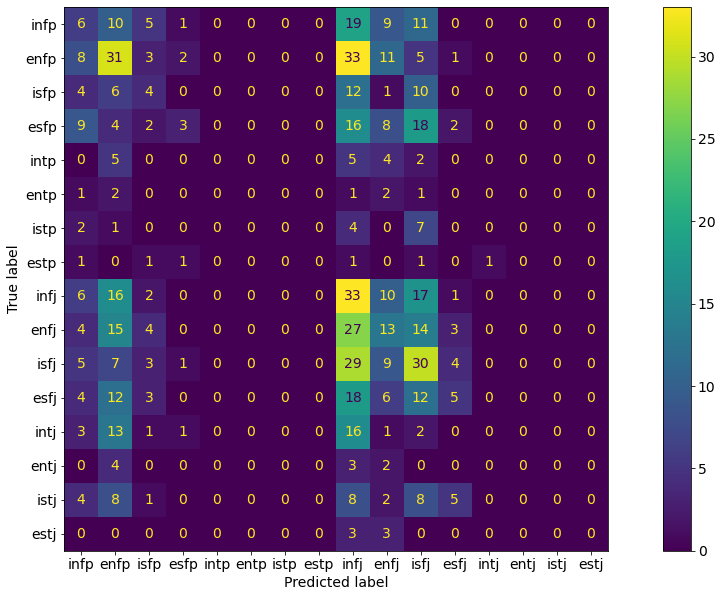

In [92]:
conf_mat_test = confusion_matrix(num_test_Y, num_predicted_test_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_test, display_labels = mbtis).plot();
fig = disp.figure_
fig.set_figwidth(20)
fig.set_figheight(10)

We see that our new model that includes the numerical features did not improve the model by at all. 

For the prediction on the training set, we achieved an accuracy of 70%. For the prediction on the test set, we achieved an accuracy of 18%. Both percentages are around the same as the prediction accuracies of the model that used only the tweets. We believe that this model also does not perform well for the same reason that the first model did not: there are not enough observations for certain types, so the model does not have a substantial corpus to learn from for these types, leading to inaccurate predictions. As with the previous model, we see from the `support` column of both classification reports that certain types are very underrepresented in both sets. From the test set's classification report, we see that this model, as with the previous model, did not classify any observations into the categories whose support is less than 50 observations. 

Similar the previous model, when we look at the vertical columns of the confusion matrix plots for this model, we can see that the model tends to only classify tweets as one of the 5 types with the most observations in the dataset (INFP, ENFP, INFJ, ENFJ, ISFJ). This similarity between the results of the 2 models may imply that the numerical features of `mean_retweet_count` and `mean_media_count` are not particularly helpful in predicting MBTI in this specific case.

### III. Simplified prediction model using tweets to classify I/E

**STEP 1**

Now, we attempt to simplify our model to see if it will be able to predict just `introvert` versus `extrovert` classifications. By simplifying the prediction as such, we are able to just have 2 categories for the model to classify into, with each category more evenly distributed than the if used all 16 types as categories. We see that there are 2021 `introvert` users and 1485 `extrovert` users, which is about a 55/45 split. Although not perfectly even, this distribution of observations in categories is much more substantial than the previous models'.

In [93]:
# function to classify introvert and extrovert

def ie_classify(string):
    if string[0] == 'i':
        output = 'introvert'
    else:
        output = 'extrovert'
    
    return output

In [94]:
df_predict['i_e'] = df_predict['mbti_personality'].apply(ie_classify)
df_predict.head()

,id,mbti_personality,merged_tweets,i_e
1,907848145,infp,exolselcaday since talking suh friendly remind...,introvert
2,97687049,infp,media feeding fear coronavirus tell us amount ...,introvert
3,63170384,infp,supergirl really missed mark kara lena episode...,introvert
4,33811202,infp,comic view bet comin six nights week getcha la...,introvert
5,236506960,infp,resigntrump data beautiful reddit sure accurat...,introvert


In [95]:
# check distribution of introverts and extroverts in df

df_predict['i_e'].value_counts()

introvert    2012
extrovert    1474
Name: i_e, dtype: int64

In [96]:
# vectorize tweets and get outcome variable as np.array

ie_X = tfidf.fit_transform(df_predict['merged_tweets']).toarray()
ie_Y = df_predict['i_e'].to_numpy()

In [97]:
# train and test sets
ie_train_X, ie_test_X, ie_train_Y, ie_test_Y = train_test_split(ie_X, ie_Y, test_size = 0.2, random_state = 200)

# train SVM
ie_clf = train_SVM(ie_train_X, ie_train_Y)

# predict
ie_predicted_train_Y = ie_clf.predict(ie_train_X)
ie_predicted_test_Y = ie_clf.predict(ie_test_X)

In [98]:
# training-set accuracy

print(classification_report(ie_train_Y, ie_predicted_train_Y))

              precision    recall  f1-score   support

   extrovert       0.86      0.70      0.77      1188
   introvert       0.80      0.92      0.86      1600

    accuracy                           0.82      2788
   macro avg       0.83      0.81      0.81      2788
weighted avg       0.83      0.82      0.82      2788



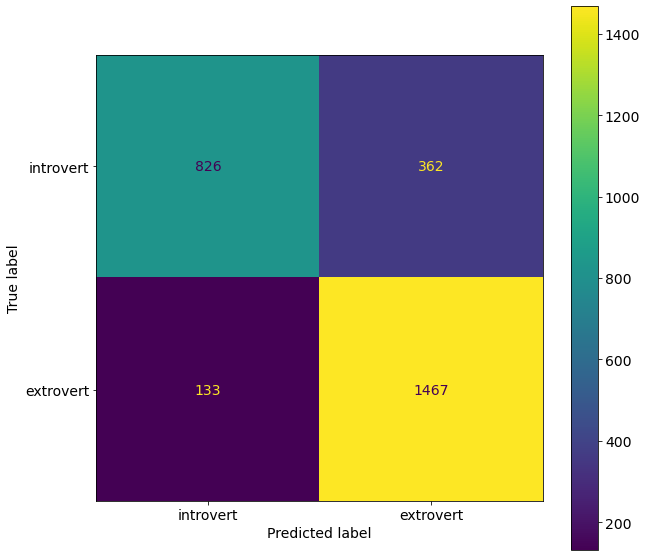

In [99]:
ies = df_predict.i_e.unique().tolist()

conf_mat_train = confusion_matrix(ie_train_Y, ie_predicted_train_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_train, display_labels = ies).plot();
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 

In [100]:
# test-set accuracy

print(classification_report(ie_test_Y, ie_predicted_test_Y))

              precision    recall  f1-score   support

   extrovert       0.45      0.36      0.40       286
   introvert       0.61      0.70      0.65       412

    accuracy                           0.56       698
   macro avg       0.53      0.53      0.52       698
weighted avg       0.54      0.56      0.55       698



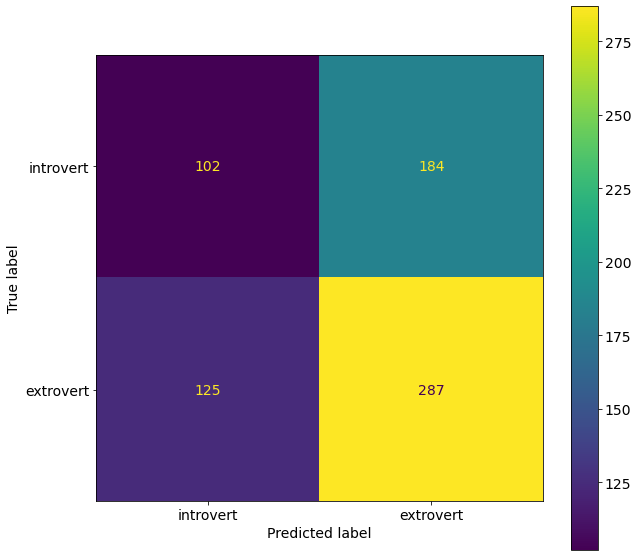

In [101]:
conf_mat_test = confusion_matrix(ie_test_Y, ie_predicted_test_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_test, display_labels = ies).plot();
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)

This model has a training accuracy of 82% and a test accuracy of 56%. As compared to the previous two models, the accuracies have improved quite a bit. We see form both classification reports that each category has much more evenly distributed `support` columns than the previous 2 models, which results in higher prediction accuracies. 

From the training set confusion matrix, we see that both categories have higher true positive rates (along the diagonal) than inaccurate predictions on the off-diagonal. The training set confusion matrix is also much closer to the ideal one (yellow along the diagonal, purple elsewhere) than the previous models' training set confusion matrix plots were. On the test set confusion matrix, `extrovert` has a high true positive count, while for the `introvert` category, 117 were categorized correctly as `introvert` and 135 were incorrectly categorized as `extrovert`; thus, the model incorrectly predicts an `introvert` as `extrovert` more times than it predicts `introvert` correctly. 

We can also see from both confusion matrix plots that the model tends to classify tweets as `extrovert` rather than `introvert`, which is interesting since the data consists of more introverts, as we saw above using `value_counts`. 

### IV. Simplified prediction model using tweets to classify F/T

**STEP 1**

We apply the same simplified model structure as the I/E classfication model to see if it will be able to predict `feeling`-led individuals versus `thinking`-led individuals. Again, we will only have 2 categories for the model to classify into, with the categories once again having about a 55/45 split. As we see below, there are 1989 users that identify as being led by `feeling` and 1517 users that identify as being led by `thinking`. 

Note that we have skipped over the second letter in the MBTI classification, `sensation` versus `intuition`. About 81% of the users had 'N' (`intuition`) as their second letter and the model predicted all tweets into the `intuition` category and none into the `sensation` category, which achieved an 81% test accuracy. Although this percentage is much higher than any of the other models, the result is not meaningful because it is simply a consequence of skewed distributions amongst the 2 categories.

In [102]:
# function to classify feeling and thinking

def ft_classify(string):
    if string[2] == 'f':
        output = 'feeling'
    else:
        output = 'thinking'
    
    return output

In [103]:
df_predict['f_t'] = df_predict['mbti_personality'].apply(ft_classify)
df_predict.head()

,id,mbti_personality,merged_tweets,i_e,f_t
1,907848145,infp,exolselcaday since talking suh friendly remind...,introvert,feeling
2,97687049,infp,media feeding fear coronavirus tell us amount ...,introvert,feeling
3,63170384,infp,supergirl really missed mark kara lena episode...,introvert,feeling
4,33811202,infp,comic view bet comin six nights week getcha la...,introvert,feeling
5,236506960,infp,resigntrump data beautiful reddit sure accurat...,introvert,feeling


In [104]:
# check distribution of introverts and extroverts in df

df_predict['f_t'].value_counts()

feeling     1972
thinking    1514
Name: f_t, dtype: int64

In [105]:
# vectorize tweets and get outcome variable as np.array

ft_X = tfidf.fit_transform(df_predict['merged_tweets']).toarray()
ft_Y = df_predict['f_t'].to_numpy()

In [106]:
# train and test sets
ft_train_X, ft_test_X, ft_train_Y, ft_test_Y = train_test_split(ft_X, ft_Y, test_size = 0.2, random_state = 200)

# train SVM
ft_clf = train_SVM(ft_train_X, ft_train_Y)

# predict
ft_predicted_train_Y = ft_clf.predict(ft_train_X)
ft_predicted_test_Y = ft_clf.predict(ft_test_X)

In [107]:
# training-set accuracy

print(classification_report(ft_train_Y, ft_predicted_train_Y))

              precision    recall  f1-score   support

     feeling       0.83      0.93      0.88      1577
    thinking       0.89      0.74      0.81      1211

    accuracy                           0.85      2788
   macro avg       0.86      0.84      0.84      2788
weighted avg       0.86      0.85      0.85      2788



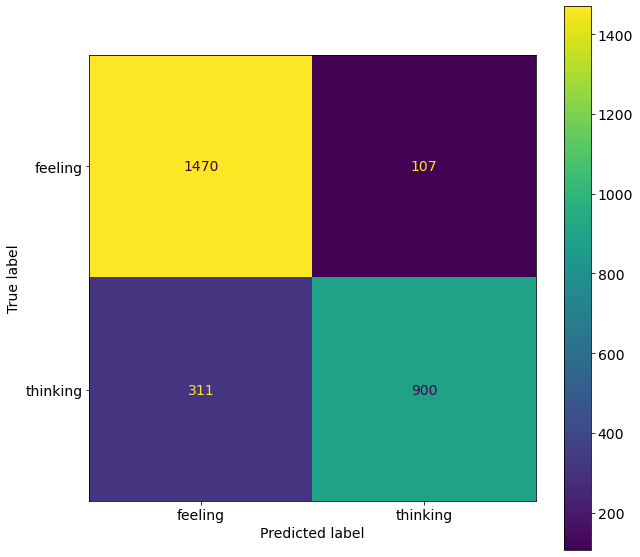

In [108]:
fts = df_predict.f_t.unique().tolist()

conf_mat_train = confusion_matrix(ft_train_Y, ft_predicted_train_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_train, display_labels = fts).plot();
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)

In [109]:
# test-set accuracy

print(classification_report(ft_test_Y, ft_predicted_test_Y))

              precision    recall  f1-score   support

     feeling       0.67      0.76      0.71       395
    thinking       0.62      0.50      0.55       303

    accuracy                           0.65       698
   macro avg       0.64      0.63      0.63       698
weighted avg       0.64      0.65      0.64       698



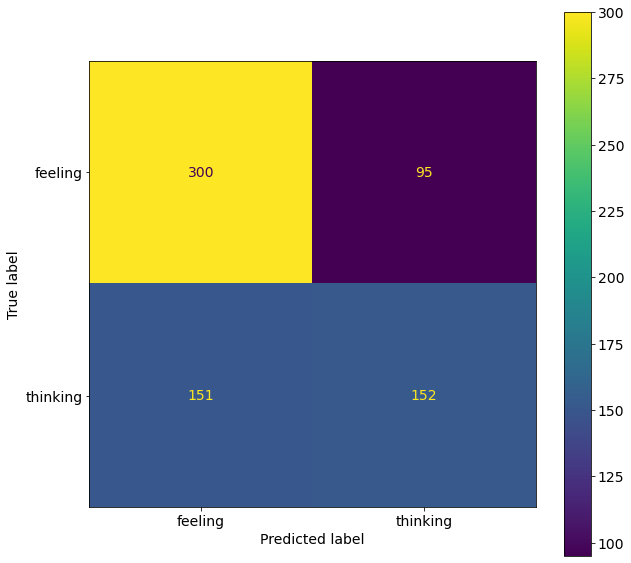

In [110]:
conf_mat_train = confusion_matrix(ft_test_Y, ft_predicted_test_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_train, display_labels = fts).plot();
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)

This model has a training accuracy of 85% and a test accuracy of 65%. As compared to the previous I/E classification model, the accuracies have improved a little more; the accuracies have improved significantly as compared the first 2 models. Again, from both classification reports we see that each category has much more evenly distributed `support` columns than the first 2 models, which results in higher prediction accuracies. 

From the training set confusion matrix, we see that both categories have higher true positive rates (along the diagonal) than inaccurate predictions on the off-diagonal. The training set confusion matrix is quite close to the ideal plot (yellow along the diagonal, purple elsewhere). On the test set confusion matrix, we see that both categories have higher true postitive counts than incorrect classification counts. 

We can also see from both confusion matrix plots that the model tends to classify tweets as `feeling` rather than `thinking`, which is consistent with the distribution of observations in these categories since the data consists of more `feeling`-led individuals, as we saw above using `value_counts`. 

### V. Simplified prediction model using tweets to classify J/P

**STEP 1**

Finally, we apply the same simplified model structure as the I/E and F/T classfication models to see if it will be able to predict `judgement`-led individuals versus `perception`-led individuals. Again, we will only have 2 categories for the model to classify into, with the categories, once again, having about a 55/45 split. As we see below, there are 1964 users that identify as being led by `judgement` and 1542 users that identify as being led by `perception`. 

In [111]:
# function to classify feeling and thinking

def jp_classify(string):
    if string[3] == 'j':
        output = 'judgement'
    else:
        output = 'perception'
    
    return output

In [112]:
df_predict['j_p'] = df_predict['mbti_personality'].apply(jp_classify)
df_predict.head()

,id,mbti_personality,merged_tweets,i_e,f_t,j_p
1,907848145,infp,exolselcaday since talking suh friendly remind...,introvert,feeling,perception
2,97687049,infp,media feeding fear coronavirus tell us amount ...,introvert,feeling,perception
3,63170384,infp,supergirl really missed mark kara lena episode...,introvert,feeling,perception
4,33811202,infp,comic view bet comin six nights week getcha la...,introvert,feeling,perception
5,236506960,infp,resigntrump data beautiful reddit sure accurat...,introvert,feeling,perception


In [113]:
# check distribution of introverts and extroverts in df

df_predict['j_p'].value_counts()

judgement     1959
perception    1527
Name: j_p, dtype: int64

In [114]:
# vectorize tweets and get outcome variable as np.array

jp_X = tfidf.fit_transform(df_predict['merged_tweets']).toarray()
jp_Y = df_predict['j_p'].to_numpy()

In [115]:
# train and test sets
jp_train_X, jp_test_X, jp_train_Y, jp_test_Y = train_test_split(jp_X, jp_Y, test_size = 0.2, random_state = 200)

# train SVM
jp_clf = train_SVM(jp_train_X, jp_train_Y)

# predict
jp_predicted_train_Y = jp_clf.predict(jp_train_X)
jp_predicted_test_Y = jp_clf.predict(ft_test_X)

In [116]:
# training-set accuracy

print(classification_report(jp_train_Y, jp_predicted_train_Y))

              precision    recall  f1-score   support

   judgement       0.80      0.92      0.85      1576
  perception       0.87      0.70      0.77      1212

    accuracy                           0.82      2788
   macro avg       0.83      0.81      0.81      2788
weighted avg       0.83      0.82      0.82      2788



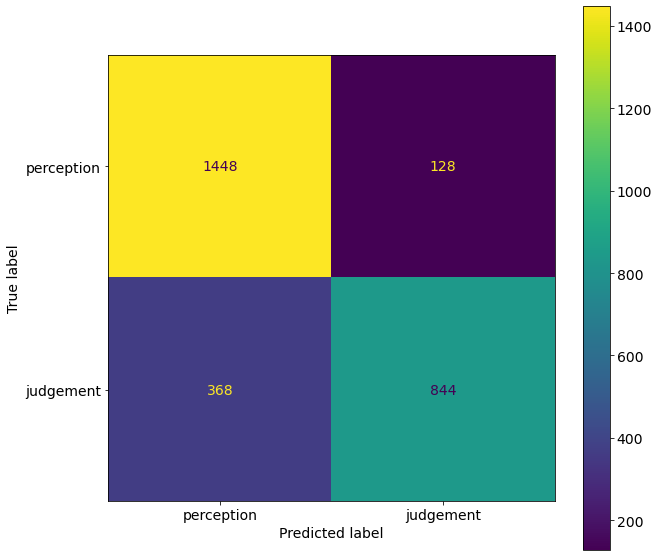

In [117]:
jps = df_predict.j_p.unique().tolist()

conf_mat_train = confusion_matrix(jp_train_Y, jp_predicted_train_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_train, display_labels = jps).plot();
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)

In [118]:
# test-set accuracy

print(classification_report(jp_test_Y, jp_predicted_test_Y))

              precision    recall  f1-score   support

   judgement       0.59      0.69      0.64       383
  perception       0.52      0.41      0.46       315

    accuracy                           0.57       698
   macro avg       0.56      0.55      0.55       698
weighted avg       0.56      0.57      0.56       698



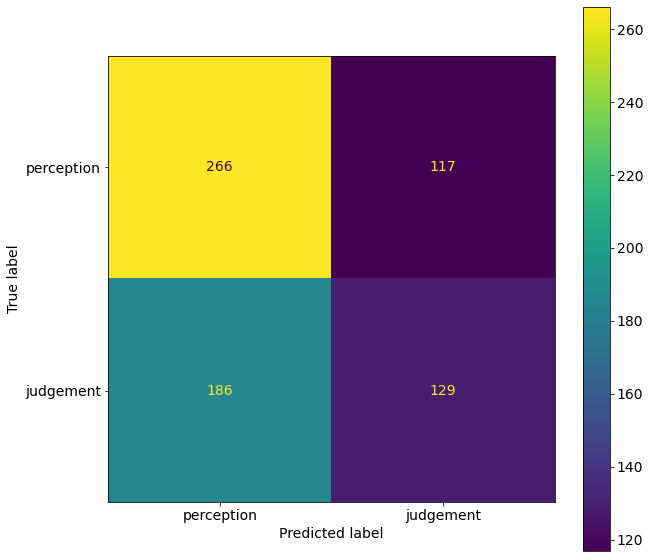

In [119]:
conf_mat_train = confusion_matrix(jp_test_Y, jp_predicted_test_Y, sample_weight = None)

disp = ConfusionMatrixDisplay(conf_mat_train, display_labels = jps).plot();
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)

This model has a training accuracy of 82% and a test accuracy of 57%. As compared to the previous F/T classification model, the accuracies have decreased a little; however, these accuracies have improved significantly as compared the first 2 models. Again, from both classification reports we see that each category has much more evenly distributed `support` columns than the first 2 models, which results in higher prediction accuracies. We also note that for this model specifically, the test set support is almost a 50/50 split, which is more evenly split than both the I/E model and the F/T model. 

From the training set confusion matrix, we see that both categories have higher true positive rates (along the diagonal) than inaccurate predictions on the off-diagonal. The training set confusion matrix is once again quite close to the ideal plot (yellow along the diagonal, purple elsewhere). On the test set confusion matrix, we see that both categories have higher true postitive counts than incorrect classification counts.  

We can also see from both confusion matrix plots that the model tends to classify tweets as `perception` rather than `judgement`, which is interesting since the data consists of more `judgement`-led individuals, as we saw above using `value_counts`. 

# Ethics & Privacy

The data we have used contain some privacy concerns to Twitter users. The data used has been collected from Twitter without informing users, which may lead to privacy issues for the individuals whose data is present in this project. However, since the data is also anonymous and we are not aware of exactly whose data was collected, it may not be as much of a concern as it seems.

We would like to note that from our research, we do not believe it is possible to scrape, share, or use data from Twitter accounts that are private, and thus all the information from the dataset are publicly available data that users have shared on public accounts. Before cleaning the dataset, it contained possible personally identifiable information because it included variables such as name (as identified on the user’s profile), username, location of the user (if provided on their profile), and the user’s bio description; all of these variables may or may not contain real information about the user that can lead to their identification. In order to ensure the privacy of these users, we dropped all of these columns to maintain anonymity of the users throughout the project. Another issue of privacy that may be potentially problematic is that the content of the tweets themselves may contain personally identifiable information, which we have tried to handle by filtering out keywords that may be indicative of this kind of information. 

A potential bias in our dataset is that people’s online personas may not be the same as their real life personas, leading to inaccuracies in their MBTI personality types. We may also only utilize tweets written in English if we perform sentiment analysis, which may skew the sample and not fully represent the population of users on twitter. Although the datasets we use may be open for public use, there may be possible concerns regarding the collecting of data from the dataset. Due to the self-reporting system, the testimonies from each individual may be considered to be inaccurate. However, the MBTI scale itself is not an accurate system for determining an individual’s personality. The Myers Briggs Personality Test is typically for those who are interested in seeking after a possible label for their identity. MBTI are based on the user's personal assumptions about themselves that are not influenced by others. MBTI as a whole is not a complete description of an individual and is simply a speculation and overview of a person’s character. 

# Conclusion & Discussion

Our question of interest is: Can we predict an individual's MBTI classification based on the content they share on Twitter, specifically their word choice, text sentiment and user tweet statistics? The results of our analysis indicate that the relationship between the variables analyzed and a user’s MBTI type is inconclusive. The dataset we used contains information from 8328 Twitter users who have self-reported their MBTI in their profiles. In our data cleaning process, we filtered the tweets to only keep the users whose first 5 tweets are all in English. We also kept the several numerical variables to see if these features could be used in conjunction with the tweet data to predict a user's MBTI. 

During EDA, we first explored the number of observations of each type in our cleaned dataset, and noted that there is quite a discrepency in the distribution of types. We then plotted and saw that average retweet count and average media count showed explicit variablility between the types that could be useful in our prediction model. We then proceeded to investigate any relationships between text sentiment of the tweets and MBTI classification. We found that certain types have a significantly higher negative sentiment metric than others, while the positive sentiment metric was not as different among types; we also found that several types have certain unique words in their top 20 most frequently used words. After exploring the data, we created a model that takes in an individual's tweets and predicts their MBTI. We used a linear SVM and a TF-IDF vectorizer to create several different prediction models. First, we created a model that attempts to predicts MBTI using tweets only and a model that attempts to predict MBTI using both tweets and the numerical features. Both models performed rather poorly with low accuracies due to there being many categories but an uneven distribution of observations per type. Then, we tried to simplify the scope of our analysis by using SVM to create a model to predict introvert versus extrovert classification only using the tweets, which performed better at about 60% test accuracy. Thus, we saw that less categories allowed us to have more observations in each category, and more evenly distributed categories, which yields better results from the model than trying to classify into all 16 categories.

 
After analyzing the results of our model, we were unable to prove our hypothesis that an individual's MBTI can be predicted using their Twitter content, which is likely due to the various limitations in our procedure. First, we filtered the dataset to include only users whose first 5 tweets are in English, which decreased the amount of words available in the corpus for the model to learn from. After filtering, the size of our observations went from around 7800 to around 3500. This, if we increased the amount of tweets per user in order to enlarge the corpus, we would lose more observations due to the English-only constraint. The other limitation of not having enough observations per type is a direct result of the corpus-size versus observation-size trade-off. Even at only 5 tweets per user, each MBTI category did not have equal amounts of observations, with over 1/4 of types having less than 100 observations. There are 16 total MBTI categories, and thus we did not have enough users per type to make more accurate predictions.

While we were unable to find substantial results using these methods, when we analyzed positive and negative sentiments during EDA, we were able to find some correlation between MBTI and text sentiment. From these results in EDA, we do still believe that the relationship between MBTI type and text content of tweets can be further explored using more data and other modelling techniques besides SVM. It is important to note, however, that MBTI classifications are likely to be inaccurate in defining an individual’s personality. MBTI types are highly subjective and biased considering they generate solely 16 categories for the vast number of personalities that exist within 7.8 billion inhabitants across the globe. By choosing to explore this topic, we have understood and accepted the possibility of unreliable predictions.

# Team Contributions

- Ashley Ho: Data Cleaning, Data Analysis and Results

- Alexa Barbosa: Background and Prior Work, Dataset Info, Frequency Distribution (EDA)

- Ariann Manlangit: Background Info, Research Question, Script, Slides

- Akhila Nivarthi: Ethics and Privacy, Conclusion & Discussion, Script

- Audrey Chung: Found Data, Ethics and Privacy, Conclusion & Discussion, Data Analysis

All team members were present at meetings and thoroughly communicated with one another. 